<a href="https://colab.research.google.com/github/Carlogui/IMEC_4434/blob/main/Upegui_Carlos__MicrostructuralCharacterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

<br>

<br>

<font color='black' align="center"><h1> </h1></font>

<font color='black'><h1 align="center">IMEC 4434 - Multi Scale Manufacturing of Composites</h1></font>

<font color='black'><h1 align="center">Professor: Clemens Dransfeld</h1></font>

<font color='black'><h1 align="center">Microstructural Characterization</h1></font>

<font color='black'><h1 align="center">Carlos Ernesto Upegui - 202213004</h1></font>

<br>

<br>

<font color='black'><center>July 21 2025<br>Summer Course <br>Bogotá DC – Colombia </center><br></font>

<strong><font color='black'><h1><left> Solution</left><h1></strong>


</font>

<strong><font color='black'><u><h1><left>Mounting the data</left><h1></font></strong>

<strong><font color='black'><u><h1><left>Install Latex</left><h1></font></strong>

In [ ]:
%%bash
apt-get update -qq
apt-get install -y --no-install-recommends \
    texlive-latex-extra \
    texlive-fonts-recommended \
    texlive-fonts-extra \
    dvipng


Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  fonts-lmodern fonts-urw-base35 ghostscript libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libgs9
  libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java
  libptexenc1 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libzzip-0-13
  poppler-data preview-latex-style t1utils tex-common texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures
Suggested packages:
  fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x
  libavalon-framework-java libcommons-logging-java-doc
  libexcalibur-logkit-java liblog4j1.2-java poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
  debhelper perl-tk xpdf | pdf-viewer xzdec cm-super texlive-fonts-extra-doc
  

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
%%bash
apt-get update -qq

apt-get install -y --no-install-recommends texlive-fonts-recommended
apt-get install -y texlive-latex-recommended
python - <<'PY'
import matplotlib as mpl, shutil, pathlib, os

cache_dir = pathlib.Path(mpl.get_cachedir()) / 'tex.cache'
if cache_dir.exists():
    shutil.rmtree(cache_dir)
print("Cache borrada:", cache_dir)
PY

Reading package lists...
Building dependency tree...
Reading state information...
texlive-fonts-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
texlive-latex-recommended is already the newest version (2021.20220204-1).
texlive-latex-recommended set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Cache borrada: /root/.cache/matplotlib/tex.cache


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
%%bash
sudo apt-get update
sudo apt-get install texlive-fonts-recommended
sudo apt-get install texlive-latex-base texlive-latex-extra
apt-get install texlive-latex-base texlive-latex-recommended texlive-fonts-recommended dvipng

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:4 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
texlive-fonts-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists...
Building dependenc

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


<strong><font color='black'><u><h1><left>Install all other dependencies and libraries</left><h1></font></strong>

In [ ]:
# Libraries needed
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, ConvexHull, cKDTree
from scipy import ndimage
from skimage.feature import peak_local_max
from shapely.geometry import Polygon, Point
import openpyxl
import imutils
import cv2
import matplotlib as mpl
import matplotlib.cm as cm
from skimage.segmentation import watershed
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from matplotlib import rc
rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
import os, pathlib, textwrap, pprint
from google.colab import drive
from pathlib import Path
from matplotlib import rc
import logging
import matplotlib
matplotlib._log.setLevel("ERROR")
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif":  ["Computer Modern"],
    "text.usetex": True
})
from matplotlib.axes._axes import _log as matplotlib_axes_logger
rc('text', usetex=False)
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BASE_DIR = '/content/drive/MyDrive/filescolab/microstructure_characterisation/Data'

if os.path.exists(BASE_DIR):

    print(f'Content from {BASE_DIR}:')

    pprint.pprint(os.listdir(BASE_DIR))
else:

    raise FileNotFoundError(f'The folder {BASE_DIR}  Does not exist.')

Content from /content/drive/MyDrive/filescolab/microstructure_characterisation/Data:
['Exp_wb', 'Simu', 'Exp_wob', 'Wuwu', 'Luy']


In [ ]:
BASE_DIR   = Path('/content/drive/MyDrive/filescolab/microstructure_characterisation/Data')
DATA_FOLD  = ['Exp_wb', 'Exp_wob', 'Simu', 'Wuwu']          # 0, 1, 2  (== fileloc)
PLOT_NAMES = ['wb', 'wob', 'simu', 'Wuwu']

fileloc = 0
ROOT     = BASE_DIR / DATA_FOLD[fileloc]
IMG_DIR  = ROOT / '02-Images'
BND_DIR  = ROOT / '01-Coordinates'
OUT_DIR  = ROOT / '03-plots'
OUT_DIR.mkdir(exist_ok=True)

<strong><font color='black'><u><h1><left>Code:</left><h1></font></strong>

Number of fibres in micrograph =  608
Micrograph:  1
Thickness segments with fibres located in it:  16




/tmp/ipython-input-51-2889999904.py:762: RuntimeWarning: Mean of empty slice
  Mean_fr_ratio = [np.nanmean(k) for k in zip(*FibRes)]


std top = 0.0
std bot = 0.0


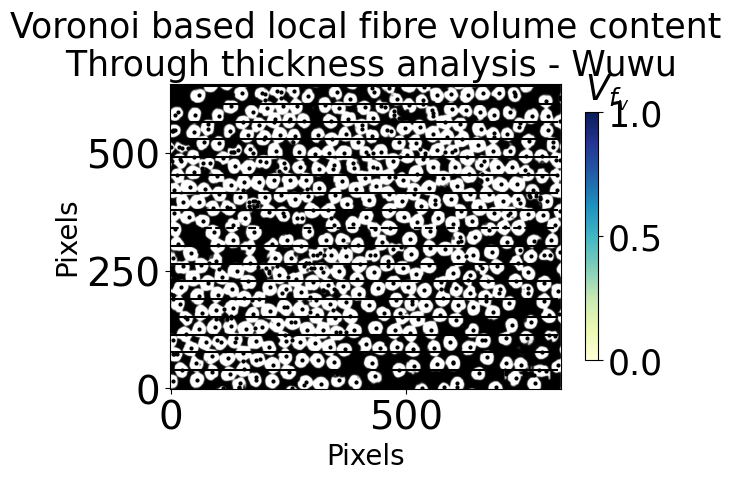

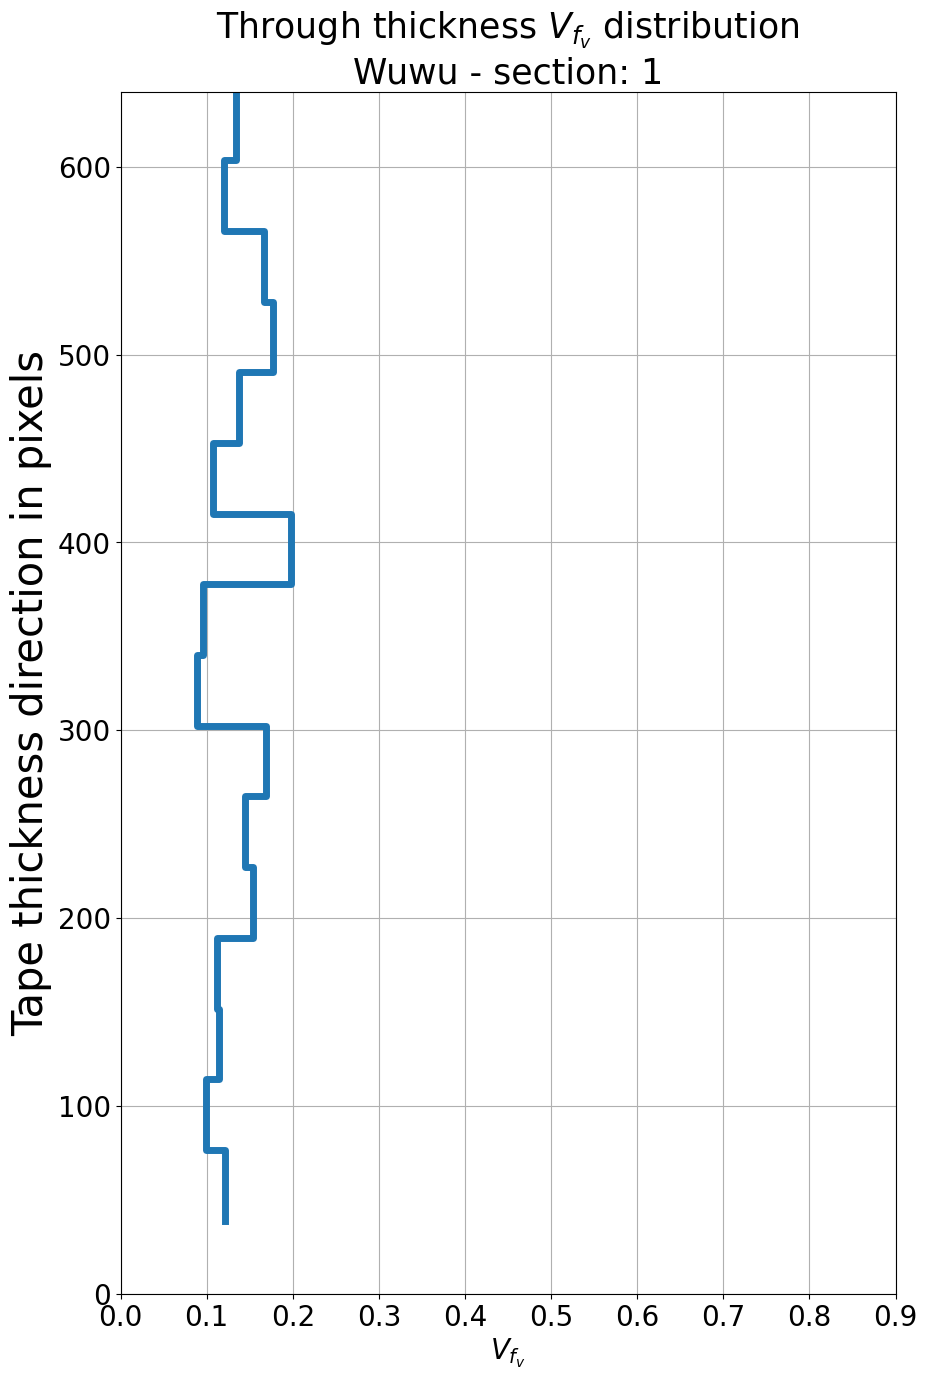

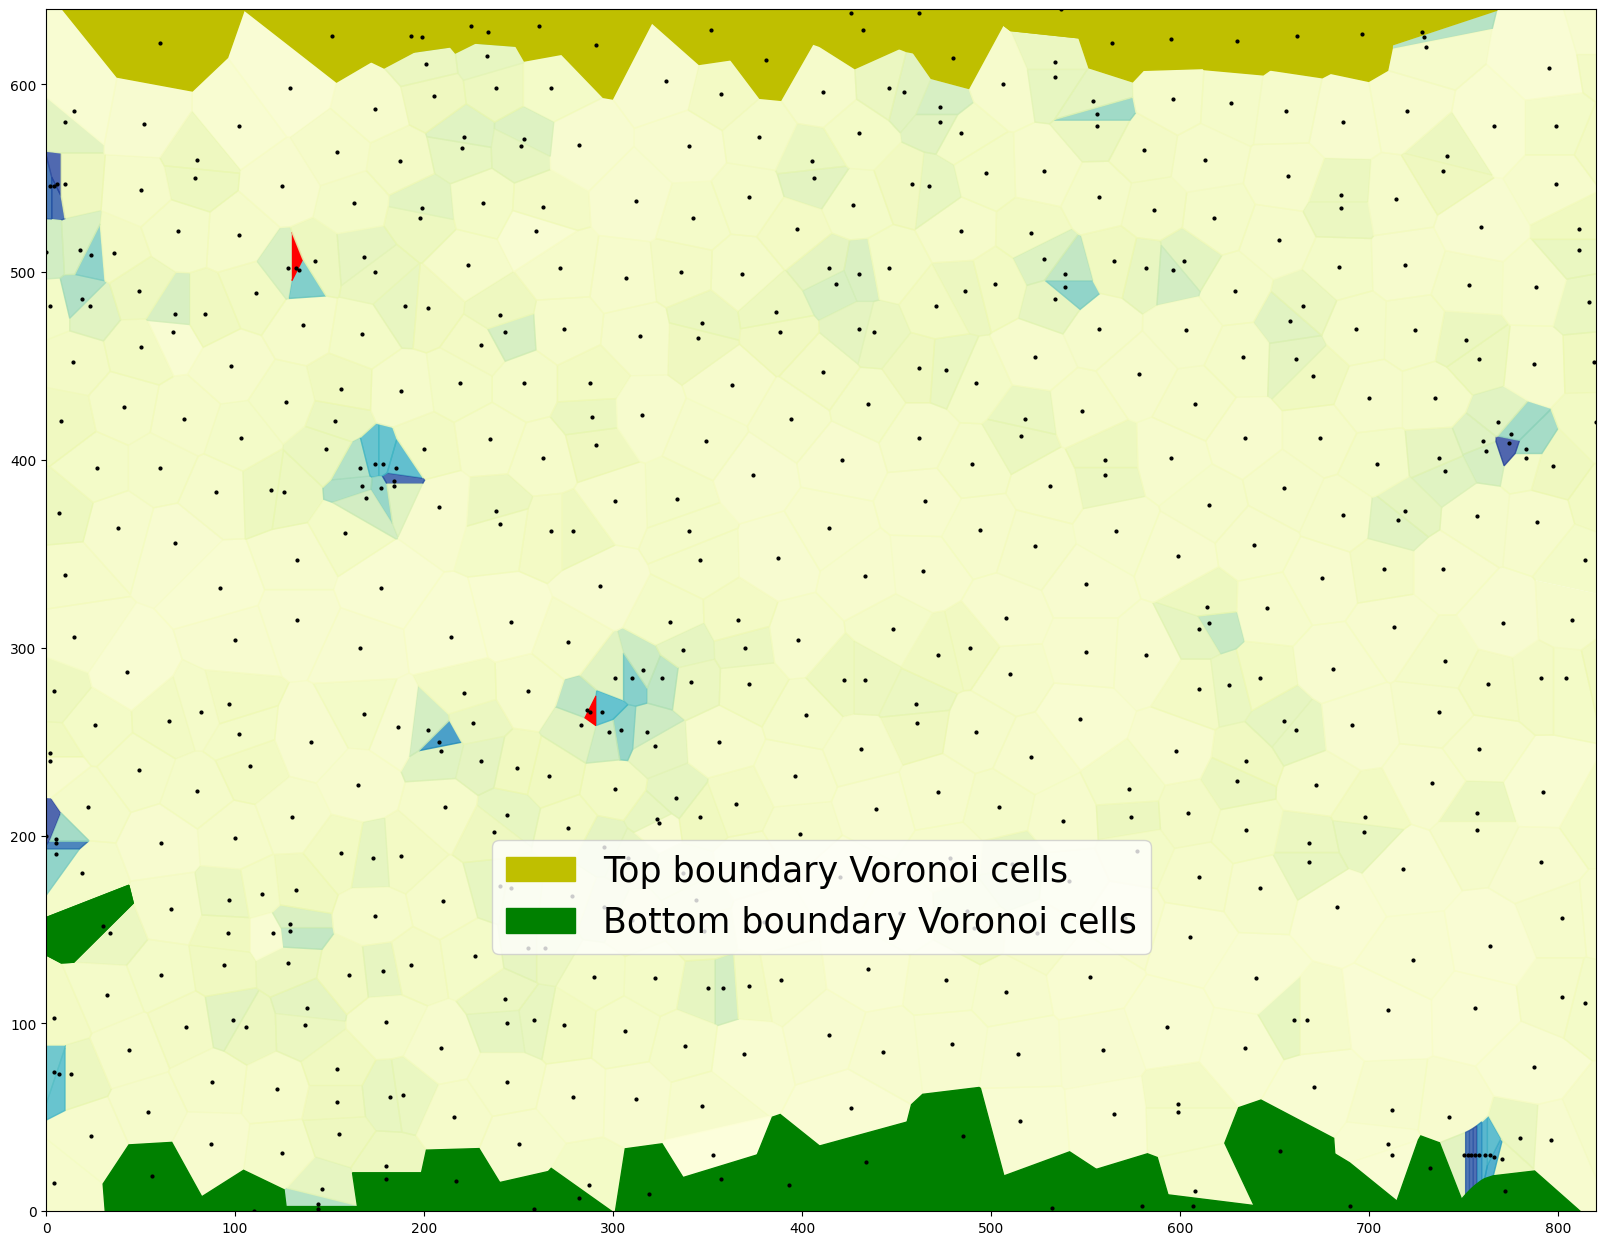

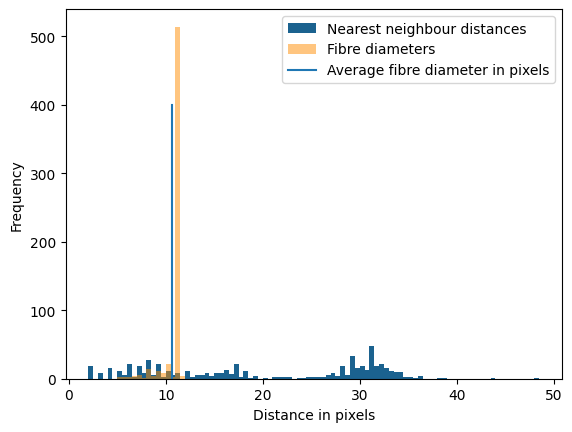

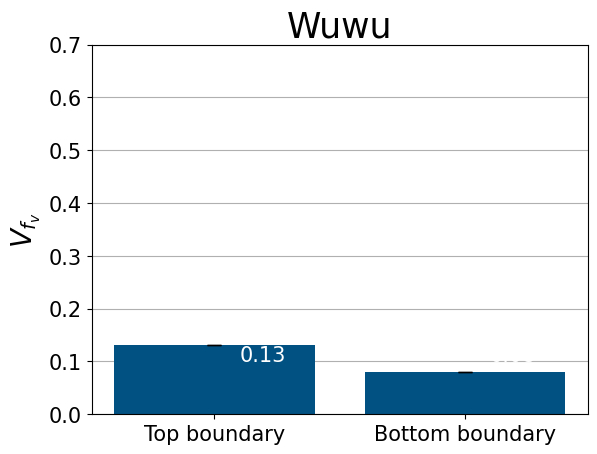

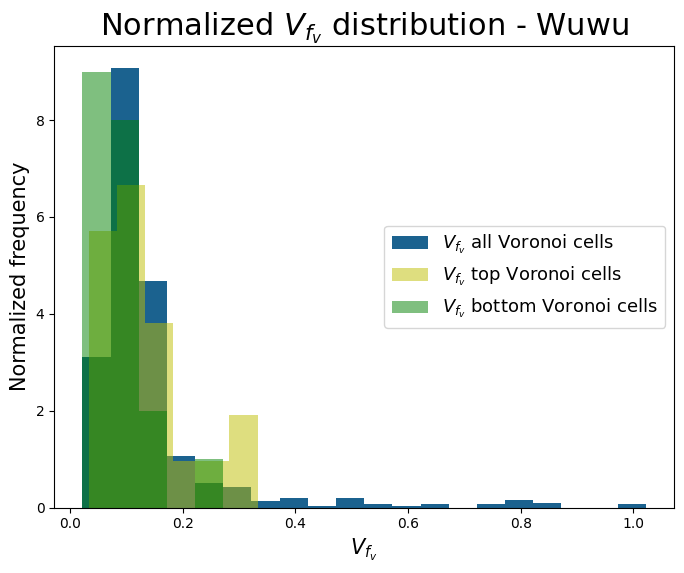

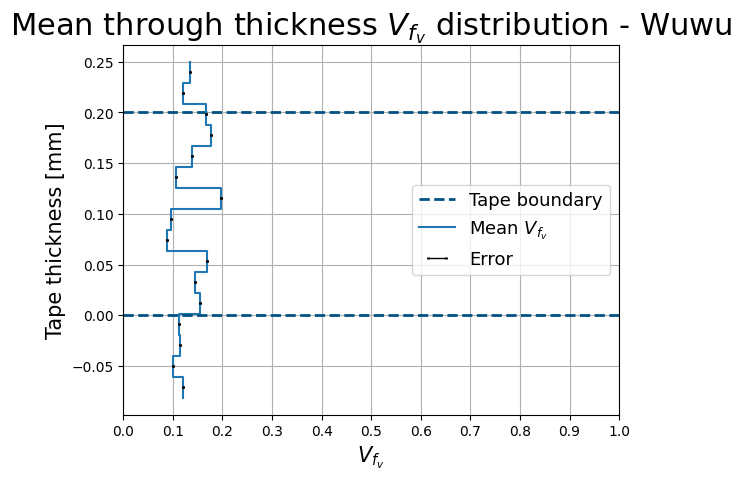

In [ ]:
# ================================================================================
# Input Variables
# ================================================================================

#Colors
Blue       = np.array([0.007, 0.317, 0.513])
LightBlue  = np.array([0    , 0.588, 0.862])
Cyan       = np.array([0    , 0.882, 0.882])

#File location definition
#For the reference images, three types are included
#0 = cropped image with boundary, 1 = cropped image without boundary, 2 = simulated image
# =============================================================================
fileloc = 0
# =============================================================================

HorPixel = [820,397,800]              #Width  of micrograph sections in pixels
VerPixel = [640,129,600]              #Height of micrograph sections in pixels
segments = [17,17,27]                 #Amount of segments for thickness distribution
segments=segments[fileloc]
t_tape   = [0.200,0.125,0.150]        #Measured actual tape thickness
t_tape   = t_tape[fileloc]


T_ratio = 0.00055                     #Transformation between pixels and millimeters.
                                      #Depends on type of microscope and magnification used

#GOOGLE DRIVE folder names:
directory = ['/content/drive/MyDrive/filescolab/microstructure_characterisation/Data/Wuwu']
plotnames = ['Wuwu']

if fileloc == 0:
    first_img = 1                     #First image number of sequence of images analysed
    last_img  = 1                     #Last  image number of sequence of images analysed
    blurkernel = 2                    #Blur kernel's square matrix size
    sp = 20                           #Mean shift spatial window radius
    sr = 20                           #Mean shift spatial color radius
    MinDistLocMax = 2                 #Min separation distance of fibres
    Grey_offset = 50                  #Delta grey value representing fibre region
    Rmax = 5.0                        #Maximum specified fibre radius

if fileloc == 1:
    first_img = 1
    last_img  = 1
    blurkernel = 2
    sp = 20
    sr = 20
    MinDistLocMax = 2
    Grey_offset = 50
    Rmax = 5.0

if fileloc == 2:
    first_img = 1
    last_img  = 1
    blurkernel = 2
    sp = 200
    sr = 200
    MinDistLocMax = 100
    Grey_offset = 10
    Rmax = 90.0

#List of image numbers for layout purposes
number = []
for i in np.arange(first_img,last_img+1,1):
    number.append(f'{i}')

#List of Excel file names for boundary polygons
BoundCorFile = []
for i in np.arange(first_img,last_img+1,1):
    BoundCorFile.append(f'BoundCor_{i}')

HorPixel = HorPixel[fileloc]
VerPixel = VerPixel[fileloc]

# Midline coordinates definition to determine the skewed lines, are different per UD tape because each micrographs is positioned differently
# Image coordinates for determining inclination of segments - data A
if fileloc == 0:
    Y8_L =  VerPixel - 300
    Y8_R =  VerPixel - 300
    Y9_L =  Y8_R
    Y9_R =  VerPixel - 300
    Y10_L = Y9_R
    Y10_R = VerPixel - 300
    Y11_L = Y10_R
    Y11_R = VerPixel - 300
    Y12_L = Y11_R
    Y12_R = VerPixel - 300
    Y13_L = Y12_R
    Y13_R = VerPixel - 300
    Y14_L = Y13_R
    Y14_R = VerPixel - 300
    Y15_L = Y14_R
    Y15_R = VerPixel - 300
    Y16_L = Y15_R
    Y16_R = VerPixel - 300
    Y17_L = Y16_R
    Y17_R = VerPixel - 300
    Y18_L = Y17_R
    Y18_R = VerPixel - 300
    Y19_L = Y18_R
    Y19_R = VerPixel - 300

    Y_midline = [[Y12_L,Y12_R],[Y15_L,Y15_R],[Y16_L,Y16_R],[Y17_L-4,Y17_R-4],[Y18_L+5,Y18_R+5],[Y19_L,Y19_R]]

if fileloc == 1:
# Image coordinates for determining inclination of segments - data B
    Y8_L =  VerPixel - 52
    Y8_R =  VerPixel - 57
    Y9_L =  Y8_R
    Y9_R =  VerPixel - 52
    Y10_L = Y9_R
    Y10_R = VerPixel - 52
    Y11_L = Y10_R
    Y11_R = VerPixel - 52
    Y12_L = Y11_R
    Y12_R = VerPixel - 57
    Y13_L = Y12_R
    Y13_R = VerPixel - 57
    Y14_L = Y13_R
    Y14_R = VerPixel - 57
    Y15_L = Y14_R
    Y15_R = VerPixel - 57
    Y16_L = Y15_R
    Y16_R = VerPixel - 57
    Y17_L = Y16_R
    Y17_R = VerPixel - 57
    Y18_L = Y17_R
    Y18_R = VerPixel - 57
    Y19_L = Y18_R
    Y19_R = VerPixel - 57

    Y_midline = [[Y12_L,Y12_R],[Y15_L,Y15_R],[Y16_L,Y16_R],[Y17_L-4,Y17_R-4],[Y18_L+5,Y18_R+5],[Y19_L,Y19_R]]

if fileloc ==2:
# Image coordinates for determining inclination of segments - data C
    Y2_L = VerPixel - 246
    Y2_R = VerPixel - 231
    Y3_L = Y2_R
    Y3_R = VerPixel - 213
    Y4_L = Y3_R
    Y4_R = VerPixel - 192
    Y5_L = Y4_R
    Y5_R = VerPixel - 175
    Y6_L = Y5_R
    Y6_R = VerPixel - 156
    Y7_L = Y6_R
    Y7_R = VerPixel - 148

    Y_midline = [[Y2_L,Y2_R],[Y3_L,Y3_R],[Y4_L,Y4_R],[Y5_L,Y5_R],[Y6_L+5,Y6_R+5],[Y7_L,Y7_R]]

X_midline = [0,HorPixel]              #Horizontal coordinates for defining skewed lines

# ================================================================================
# ================================================================================
# # FUNCTION BLOCKS
# ================================================================================
# ================================================================================

# ================================================================================
# Function to extract boundary points from excel file
# ================================================================================
def TapeBoundaryExtraction(BoundCorFile):
    """
    Input:  BoundCorFile;             Excel sheet with boundary location coordinates
    Output: boundary;                 List of boundary location coordinates from Excel
    """
    #Opening Excel file with active sheet of boundary x-, y-coordinates
    book = openpyxl.load_workbook(directory[fileloc]+'/01-Coordinates/'+BoundCorFile[q]+'.xlsx')
    sheet2 = book.active

    #Extract boundary coordinates (x,y data) from BoundCor Excel sheet, ignore first row because of ImageJ output
    BoundaryCoordinates = []
    for row_j in range(2,sheet2.max_row+1):
        x = float(sheet2.cell(row=row_j,column=2).value)
        y = float(sheet2.cell(row=row_j,column=3).value)
        BoundaryCoordinates.append([x,(VerPixel-y)])
    BoundaryCoordinates = np.asarray(BoundaryCoordinates)

    #Create polygon from all imported boundary coordinates
    boundary = Polygon(BoundaryCoordinates)

    return boundary

# =============================================================================
# Function to extract fibre location from micrograph
# =============================================================================
def FibreLocExtraction(image):
    """
    Input:  image;                    Input micrograph

    Output: coordinates_full          List with x- and y-coordinates of detected fibre centres
    """
    #Input image
    image = cv2.flip(image,0)
    #Mean shift filter
    shifted = cv2.pyrMeanShiftFiltering(image, sp, sr)
    #Blur applied
    blur = cv2.blur(shifted,(blurkernel,blurkernel))
    #Gray scaling
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    #Binary + Otsu thresholding
    thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    #Compute the exact Euclidean distance from every binary pixel to the nearest zero pixel, then find peaks in this distance map
    D = ndimage.distance_transform_edt(thresh)
    localcoordinates = peak_local_max(D, min_distance=MinDistLocMax,labels=thresh)
    localMax = np.zeros_like(D, dtype=bool)
    localMax[tuple(localcoordinates.T)] = True

    #Perform a connected component analysis on the local peaks, using 8-connectivity, then appy the Watershed algorithm
    markers = ndimage.label(localMax, structure=np.ones((3,3)))[0]
    labels = watershed(-D, markers, mask=thresh) #-D is used because the watershed function uses local minima, instead of local maxima

    x_lst = []; y_lst = []; r_lst=[]; coordinates = []

    #Loop over the unique labels returned by the Watershed algorithm
    for label_it in np.unique(labels):
    #If the label is zero, we are examining the 'background', so simply ignore it
        if label_it == 0:
            continue
    # otherwise, allocate memory for the label region and draw it on the mask
        else:
            mask = np.zeros(gray.shape,dtype= "uint8")
            mask[labels == label_it] = 255 #Set color of this object to white.
            #Find contours based on label mask
            cnts = cv2.findContours(mask.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
            cnts = imutils.grab_contours(cnts)
            #Extract largest contour from cnts based on area calculation
            c = max(cnts,key=cv2.contourArea)
            #Draw a circle enclosing the object
            ((x,y),r) = cv2.minEnclosingCircle(c)

            x_lst.append(x); y_lst.append(y); r_lst.append(r)
            coordinates.append([x,y])
    coordinates = np.asarray(coordinates)
    near_distance = np.zeros((len(coordinates),5))

    #Proximity analysis
    adapt = []

    for i in range(len(coordinates)):

        #Defines the point for which its nearest neighbour is found
        base_point = coordinates[i]
        #Removes the base point from the coordinates array to prevent false detection
        coordinates = np.delete(coordinates,i,axis=0)
        #Distance between base point and its nearest neighbour (NN) fibre {0 = distance, 1 = index of point}
        near_distance[i][0] = NearestFibre(coordinates,base_point)[0]
        near_point_index    = NearestFibre(coordinates,base_point)[1]
        if near_distance[i][0] <= MinDistLocMax:
            adapt.append((i,base_point[0],base_point[1],coordinates[near_point_index][0],coordinates[near_point_index][1]))

        #Restore original coordinates list for next iteration
        coordinates = np.insert(coordinates,i,base_point,axis=0)
    adapt = np.asarray(adapt)

    #Loop to combine two detected points which are closer to each other than MinFibRadius to one single coordinate(fibre)
    created_coords = []
    for i in range(len(adapt)):
        x_new = (adapt[i][1]+adapt[i][3]) /2
        y_new = (adapt[i][2]+adapt[i][4]) /2
        created_coords.append((x_new,y_new))

    #Remove duplicate points
    created_coords = np.asarray(list(dict.fromkeys(created_coords)))

    #Remove base points with NN < MinRadius from coordinates list...
    if len(adapt)!= 0:
        indices = adapt[:,0]
        coordinates_new = np.asarray([e for i, e in enumerate(coordinates) if i not in indices])
        #... and combine with custom defined coordinates
        coordinates_full = np.concatenate((coordinates_new,created_coords),axis=0)
    else:
        coordinates_full = coordinates

    return coordinates_full,r_lst

# =============================================================================
# Function to define fibre radii based on micrograph
# =============================================================================
def FibreRadiusCalc(coordinates,boundary):
    """
    Input:  coordinates;              List with x- and y-coordinates of detected fibre centers
            boundary                  Boundary polygon
    Output: coordinates_full          List with x- and y-coordinates of fibre centres
    """
    #Find fibre coordinates which are Not In Polygon (nip)
    nip = []
    for i in range(len(coordinates)):
            if boundary.contains(Point(coordinates[i])) == False:
                nip.append(i)
    coordinates_inpoly = np.asarray([e for i, e in enumerate(coordinates) if i not in nip])

    #Grey transfrom of input micrograph
    imgGrey = cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),0)

    #Define the four radii, and consequently the average R.
    Fibre_data  = []
    for i in range(len(coordinates_inpoly)):
        x_centre = int(np.round(coordinates_inpoly[i][0]))
        y_centre = int(np.round(coordinates_inpoly[i][1]))
        R_left   = Radius_left(y_centre,x_centre,imgGrey)
        R_right  = Radius_right(y_centre,x_centre,imgGrey)
        R_top    = Radius_top(y_centre,x_centre,imgGrey)
        R_bot    = Radius_top(y_centre,x_centre,imgGrey)
        R_lst= [R_left,R_right,R_top,R_bot]
        count = len([i for i in R_lst if i < 1.5])

        if count >= 3:
            continue
        R_avg = (R_left+R_right+R_top + R_bot)/4
        if R_avg < 2.5:
            continue
        else:
            Fibre_data.append([x_centre,y_centre,R_avg])

    Fibre_data = np.asarray(Fibre_data)

    return coordinates_inpoly,Fibre_data

# ================================================================================
# Function to finitise the voronoi vertices which are at infinity
# 'Code to finitise Voronoi cells obtained (and modified) from: Stackoverflow.com'
# ================================================================================
def voronoi_finite_polygons_2d(vor):
    """
    Input:  vor;                      Voronoi Diagram of coordinates
    Output: new_regions;              List of inidices of (new) Voronoi vertices
            new_vertices;             List of initial Voronoi vertex coordinates (x,y) with new vertices added at a finite distance added to the end of the list.
    """
    #Empty list for the new regions and copy array of 'old' vertices to a new list
    new_regions = []
    new_vertices = vor.vertices.tolist()

    #Center vector, mean of x- and y-coordinate of input coordinates
    center   = vor.points.mean(axis=0)
    #Radius distance of 2x (amx fibre x-,y-coordinate) for calculation to make inifite Voronoi vertices finite
    # dist     = 2*vor.points.ptp().max()
    dist = 2 * np.ptp(vor.points, axis=0).max()


    """
    vor.ridge_points => array ([N*[]]) where N = number of Voronoi ridges (lines), Voronoi ridge is always perpendicular to a line drawn between two input points. [Ppoint1,Ppoint2] Defines between which input points the Voronoi ridge is 90 deg.

    vor.ridge_vertices => list of tuples [N*[]] where N = number of Voronoi vertices. [Vpoint1,Vpoint2] defines indices of Voronoi vertices defining each Voronoi ridge, -1 index defines point at infinity.

    The for loop below defines N*[p1,p2,v1,v2] where N = number of input points and creates dictionary item for each input point, p1 (and second input point, p2) where v1 and v2 represent the Voronoi vertex indices of the Voronoi ridge (perpendicular to line drawn between p1 and p2 input points) vertices
    """
    #Empty dictionary for Voronoi ridges
    all_ridges = {}
    #Append point1 and corresponding p2 with v1 and v2, also append p2 and corresponding p1 with v1 and 2
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    #Reconstruct infinite regions, point_region: python list with cell indices
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]  #list with indices corresponding to cell

        #When all indices >=0 -> no inifinite points -> finite area, append Voronoi vertices to the list of 'new' regions
        if all(Vor_index >= 0 for Vor_index in vertices):
            new_regions.append(vertices)
            continue

        #Indices not all >0 -> make Voronoi vertices finite
        ridges = all_ridges[p1]          # Extract p1 related data from dictionary

        #ridges does contain multiple p1,p2,v1,v2 combinations, filters out the finite regions with same p1 where v1 and v2 >0
        new_region = [v for v in vertices if v >= 0]

        #When v2 is the -1 Voronoi vertex, swap with v1 to make v1 leading variable for Vertex at inifinity. If v2 >= 0 and v1 >=1, this ridge is already in the new_region list
        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue

            #v1 Is the point at infinity and must become finite. Define tangent vector between p1 and p2 with ((Xp2 - Xp1), (Yp2-Yp1) = (Xt,Yt))
            t = vor.points[p2] - vor.points[p1]

            #Normalise tangent vector by means of t / sqrt(Xt^2+Yt^2)
            t = t / np.linalg.norm(t)
            #Define normal vector of t
            n = np.array([-t[1], t[0]])

            #Define midpoint between p1 and p2 input coordinates
            midpoint = vor.points[[p1, p2]].mean(axis=0)

            #Vector of normal vector times sign dot product between midpoint and centre vector
            direction = np.sign(np.dot(midpoint - center, n)) * n

            #Finite point is defined based on coordinates of Voronoi vertex (v2) and direction vector * radius distance
            fin_point = vor.vertices[v2] + (direction * dist)

            #The length of new_vertices list determines the new Voronoi vertex index
            new_region.append(len(new_vertices))

            #Appends new finite Voronoi vertex coordinates to list of original Voronoi vertex coordinates (extends the original list)
            new_vertices.append(fin_point.tolist())

        #New Voronoi vertex coordinates (x,y) array (with originial finite Voronoi indices plus the corresponding 'new' fin_point coordinates ([N*[x,y]]) where N = number of Voronoi vertices of specific cell)
        vs = np.asarray([new_vertices[v] for v in new_region])


        #Average vector of all Voronoi vertex coordinates
        c = vs.mean(axis=0)
        #Subtract mean from vectors from vs array and define angle between horizontal axis and calculated mean vector
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])

        #Sort angles counter clock-wise
        new_region = np.array(new_region)[np.argsort(angles)]

        #Append new region to array of all regions ('new_regions')
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

# ================================================================================
# Function for polygon modification according to specified boundary and polygon
# plots with color plot specified according to local Vfv
# ================================================================================
def PolygonModification(regions,vor,vertices,radius_lst):
    """
    Input:  regions;                  Finitised voronoi regions
            vor;                      Voronoi pattern applied to the input coordinates
            vertices;                 Array of all Voronoi vertices (incl modified)
            radius_lst;               List with individual fibre diameters
    Output: norm;                     Normalised color map between 0 and 1
            Local_FibVol2;            Local Vfv values of each Voronoi cell
            Area_nett2;               List with nett areas of all Voronoi cells
            Elst;                     List summation of errorneous Vfv cells
            BoundCell;                List with CN's of Voronoi cells intersecting micrograph boundary
            BoundPoly;                List with polygons of Voronoi cells intersecting micrograph boundary
    """

    Elst           = [ ]
    Area           = [ ]                    #List for area values (unsorted areas)
    Avor_bound     = [ ]                    #Voronoi areas of boundary polygons
    Area_ordered2  = [0]*len(regions)       #list of areas orderd by CN number
    Area_nett2     = [0]*len(regions)       #List for nett areas (Acell-Afib)
    Local_FibVol2  = [0]*len(regions)       #Vfv ratio of Voronoi cell
    n= 0                                    #Counter definition
    radius_lst_ordered = [0]*len(regions)   #List for radii (ordered acc. to CN)

    #Normalise data from 0 to 1 without clipping (for cells with Vfv out-of-range)
    norm = mpl.colors.Normalize(vmin=0, vmax=1.0, clip=False)

    #Map color scale based on norm and color scheme
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.YlGnBu)
    #Define figure and size based on pixel ratio (+title of window)
    plt.figure('Voronoi Diagram section '+number[q],figsize=(20,(VerPixel/HorPixel*20)))

    #Boundary intersection check:
    BoundCell =[]; BoundPoly=[]

    #Region are the Voronoi indices of a specific cell, CN is the cell number
    for i, (region, CN) in enumerate(zip(regions, vor.point_region)):

        A_fib = (np.pi * (radius_lst_ordered[CN])**2 )
        #Vertices[region] gives the x,y-coordinates of voronoi vertices
        polygon = vertices[region]

        #Poly is a polygon constructed from the coordinates specified by polygon
        poly = Polygon(polygon)

        #Transform polygon 'old' coordinates from x y, x y .. to (x,y),(x,y)..etc.
        poly_old = [p for p in poly.exterior.coords]

        #If poly intersects with boundary, polygon vertex coordinates are changed
        poly = poly.intersection(boundary)

        if poly.geom_type == 'MultiPolygon':
            #Transform second polygon 'new' coordinates from x y, x y .. to (x,y),(x,y)..etc.
            poly_new = [p for p in poly[0].exterior.coords]
        elif poly.geom_type == 'GeometryCollection':
            poly_new = [p for p in poly[1].exterior.coords]
        else:
            #Transform polygon 'new' coordinates from x y, x y .. to (x,y),(x,y)..etc.
            poly_new = [p for p in poly.exterior.coords]

 	    #Calculate area of poly_new (modified polygon or not)
        Area.append(ConvexHull(poly_new).volume)

        #Area, radii, A_fib and Nett area lists ordered with CN as leading variable
        Area_ordered2[CN]      = Area[i]
        radius_lst_ordered[CN] = radius_lst[i]
        A_fib                  = float((np.pi * (radius_lst_ordered[CN])**2 ))
        Area_nett2[CN]         = Area_ordered2[CN] -  A_fib

        #Colorise polygon based on the Vfv and the color scale mapper, if statement is used to correct cells with 1 < Vfv < 0
        if Area_nett2[CN] < 0:
            plt.fill(*zip(*poly_new), color='r',alpha=1,linewidth=1.0,linestyle='-',closed=False)
            Elst.append(Area_nett2[CN])
            #Set local Vfv to 1 to neglect incorrect data values
            Local_FibVol2[CN] = 1
        else:
            Local_FibVol2[CN] = A_fib / Area_ordered2[CN]
            plt.fill(*zip(*poly_new), color=mapper.to_rgba(Local_FibVol2[CN]), alpha=0.8, linewidth = 1.0, linestyle = '-',closed = False)
        n = n+1

        #Statement to check whether or not the polygon is modified due to boundary intersections
        if np.round(ConvexHull(poly_old).volume,4) != np.round(ConvexHull(poly_new).volume,4):
            BoundCell.append(CN)
            BoundPoly.append(poly_new)
            Avor_bound.append(Area_ordered2[CN] -  A_fib)




    return norm, Area,Local_FibVol2,Area_nett2,Elst,BoundCell,BoundPoly,Avor_bound

# ================================================================================
# Function to plot additional elements to Voronoi diagram
# ================================================================================
def VoronoiPlot(coordinates,Fibre_data,Acoff,Bcoff,vor,Area,norm,HorPixel,VerPixel):
    """
    Input:  coordinates;              Input fibre location coordinates
            Fibre_data;               Input fibre array for plotting
            Acoff, Bcoff;             Coefficients for calculating segment lines
            vor;                      Voronoi pattern applied to the input coordinates
            Area;                     List with areas of all polgyon shapes
            norm;                     Normalised color map between 0 and 1
            HorPixel;                 Image size width in pixels
            VerPixel;                 Image size height in pixels
    Output: DisList;                  List with CN, Vor. cell number, y-coordinate, cell area
            deltri_area;              Area list of Delaunay triangles
    """
    # Plot original fibre locations as dots in same figure
    plt.plot(Fibre_data[:, 0], Fibre_data[:, 1], 'ko',markersize = 2)

    #DisList is a matrix with: [Input coordinate number, CN, input y-coordinate, area Vor. cell, input x-coordinate]
    DisList = np.zeros((len(Fibre_data),5))
    m = 0
    for i in (vor.point_region):
        DisList[m,0] = m                        # Number of input coordinate
        DisList[m,1] = i                        # Number of corresponding Voronoi Cell
        DisList[m,2] = Fibre_data[m][1]         # Y-coordinate of input coordinate
        DisList[m,3] = Area[m]                  # Area of Voronoi cell
        DisList[m,4] = Fibre_data[m][0]         # X-coordinate of input coordinate
        m = m+1

    #Load and display actual image behind Voronoi diagram
    plt.xlim(0, HorPixel)                             #Set limits of x- and y-axis
    plt.ylim(0, VerPixel)
    img_file = directory[fileloc]+'/02-Images/'+number[q]+'.png'
    img = plt.imread(img_file)

    # modify by ChatGPT
    # Create a figure and axis for imshow
    fig, ax = plt.subplots()
    ax.imshow(img[::-1], origin='lower', cmap=plt.cm.gray)

    # Plot original fibre locations on the same axis
    ax.plot(Fibre_data[:, 0], Fibre_data[:, 1], 'ko', markersize=2)

    # Plot preparation
    ax.set_title('Voronoi based local fibre volume content - '+plotnames[fileloc], fontsize=25)
    ax.set_xlabel('Pixels', fontsize=20)
    ax.set_ylabel('Pixels', fontsize=20)
    ax.tick_params(axis='both', labelsize=28)

    cb = fig.colorbar(cm.ScalarMappable(norm=norm,cmap=cm.YlGnBu),ax=ax,shrink=0.65)
    cb.ax.tick_params(labelsize=25)
    cb.ax.text(0.0, 1.05, r'$ V_{f_{v}}$', rotation=0, fontsize=25)

    # # Original code
    # plt.imshow(img[::-1],origin = 'lower',cmap = plt.cm.gray)
    # #Plot preparation
    # plt.title('Voronoi based local fibre volume content - '+plotnames[fileloc],fontsize=25)
    # plt.xlabel('Pixels',fontsize=30)
    # plt.ylabel('Pixels',fontsize=30)
    # plt.xticks(fontsize=28)
    # plt.yticks(fontsize=28)
    # cb = plt.colorbar(cm.ScalarMappable(norm=norm,cmap=cm.YlGnBu),ax=None,shrink=0.65)
    # cb.ax.tick_params(labelsize=25)
    # ax = cb.ax
    # ax.text(0.0,1.05,r'$ V_{f_{v}}$',rotation=0,fontsize=25)

    #Segmental distribution of micrographs
    t = VerPixel                      #Total height of micrograph
    dt = t/segments                   #Thickness of one segment
    midpoint = int(segments/2)

    # Save the first plot
    plt.tight_layout()
    plt.savefig(directory[fileloc]+'/03-plots/VoronoiDiagram_'+plotnames[fileloc]+'_'+number[q]+'.png', format='png',dpi=50)

    #From midpoint on, for each iteration there will be a paralel line drawn at distance -k*dt and +k*dt from the mid-line
    for k in range(midpoint+1):
        Yleft_bot  = Acoff * 0 + Bcoff - k * dt
        Yleft_top  = Acoff * 0 + Bcoff + k * dt
        Yright_bot = Acoff * HorPixel + Bcoff - k * dt
        Yright_top = Acoff * HorPixel + Bcoff + k * dt

        if k == 0:
            plt.plot(X_midline,(Yleft_bot,Yright_bot),linestyle='--',color = 'black')
        else:
            plt.plot(X_midline,(Yleft_bot,Yright_bot),color = 'black')
            plt.plot(X_midline,(Yleft_top,Yright_top),color = 'black')

    # Update the title and save the second plot
    plt.title('Voronoi based local fibre volume content\n Through thickness analysis - '+plotnames[fileloc],fontsize=25)
    plt.tight_layout()
    plt.savefig(directory[fileloc]+'/03-plots/VoronoiDiagram_'+plotnames[fileloc]+'_'+number[q]+'_skewlines.png', format='png',dpi=50)

    return DisList

# ================================================================================
# Function to plot the Voronoi pattern over actual image, including fib/res
# distribution expressed as color map
# ================================================================================
def VorDistributionPlot(VerPixel,segments,DisList,Fibre_data):
    """
    Input:  Fibre_data;              Input fibre location coordinates
            vor;                      Voronoi pattern applied to the input coordinates
            Area;                     List with areas of all polgyon shapes
            norm;                     Normalised color map between 0 and 1
            VerPixel;                 Image size height in pixels
            segments;                 Amount of segments sections through thickness
            DisList;                  List with CN, Vor. cell number, y-coordinate, cell area
            D_fib;                    Measured fibre diameter (CONSTANT A NOT USED ANYMORE)
    Output: FibVol_dbl;               List with fib/res distribution through thickness
            Loc_FibVol_lst_avg;       Average Vfv per thickness segment
    """
    t = VerPixel
    dt = t/segments
    #Thickness distribution points, n segment means n+1 edge points
    Td = np.zeros((1,segments+1))

    #List (one for each segment) with local Vfv, and list for avg segment value
    Loc_FibVol_lst     = [[] for _ in range(segments)]
    Loc_FibVol_lst_avg = [[] for _ in range(segments)]

    # count loops from 0 to len(DisList[:,2]), Y is each input y-coordinate
    for count , Y in enumerate(DisList[:,2]):
        X = DisList[count,4]
        midpoint = int(segments/2)
        #Define segment distribution coordinates, the top and bottom y-coordinate of a section are x-coordinate dependent due to the skewness of the lines
        for i in range(midpoint+1):
            Td[0,midpoint-i] = Acoff*X+Bcoff - i * dt
            Td[0,midpoint+i] = Acoff*X+Bcoff + i * dt
        #Define left and boundary of specific thickness segment
        for n in range(segments):
            left  = Td[0,n]
            right = Td[0,n+1]
            #Check in which segment the y-coordinate falls
            if Y >=left and Y< right:
                Vfv = (np.pi*(Fibre_data[count,2])**2)/DisList[count,3]
                if Vfv > 1:
                    # print(Vfv)
                    Vfv = 1
                Loc_FibVol_lst[n].append(Vfv)      #append the cross-sectional area of the fibre divided by the area of the voronoi cell
                #If segment found, break for loop to speed up calculation
                break
    #For segmental plot, twice each value needed (except edge values)
    Td_dbl = []; FibVol_dbl = []

    #Prepare double thickness distribution coordinates list
    for i in range(segments):
        Loc_FibVol_lst_avg[i] = np.mean(Loc_FibVol_lst[i])
        FibVol_dbl.append(Loc_FibVol_lst_avg[i])
        FibVol_dbl.append(Loc_FibVol_lst_avg[i])
        Td_dbl.append(Td[0][i])
        Td_dbl.append(Td[0][i])
    Td_dbl.append(Td[0][i+1]); Td_dbl.append(Td[0][i+1])
    Td_dbl = Td_dbl[1:-1]

    #Plotting commands
    fig = plt.figure(number[q],figsize=(20*0.5,(VerPixel/HorPixel*20)))
    ax = fig.add_subplot(111)
    plt.title('Through thickness $V_{f_{v}}$ distribution\n'+plotnames[fileloc]+' - section: '+number[q],fontsize=25)
    plt.plot(FibVol_dbl,Td_dbl, label = 'Fiber-Resin Ratio',linewidth=5); plt.grid(True)
    plt.xlabel('$V_{f_{v}}$',fontsize=20)
    plt.ylabel('Tape thickness direction in pixels',fontsize=30)
    plt.yticks(np.arange(0,VerPixel,100))
    plt.xticks(np.arange(0,1,0.1))
    plt.ylim(0,VerPixel)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.tick_params(axis='y', which='major', labelsize=20)
    plt.savefig(directory[fileloc]+'/03-plots/FibResDistribution'+number[q]+'_skew.png', format='png',dpi=200)

    return FibVol_dbl,Loc_FibVol_lst_avg,Loc_FibVol_lst


# ================================================================================
# Function which filters the polgyons which intersect with the defined boundary
# ================================================================================
def Polygon_edge_detection(BoundCell,DisList,HorPixel,VerPixel):
    #List Vfv values of Voronoi cells at top and bottom boundary
    Boundpoly_sel_top=[]; Boundpoly_sel_bot=[]
    BoundcellFR_top  =[]; BoundcellFR_bot  =[]
    TopboundArea = []; Bottomboundarea = []
    """
    Input:  BoundCell;                Input list with the Voronoi CN which intersects with the pre-defined boundary
            DisList;                  Matrix with x-,y-coordinates, CN's, Cell areas
            HorPixel;                 Width of input image in pixels
            VerPixel;                 Height of input image in pixels
    Output: avgFR_bound_top;          List with averaged FR ratio of top edge Voronoi cells
            avgFR_bound_bot;          List with averaged FR ratio of bot edge Voronoi cells
    """
    for count,i in enumerate(BoundCell): #Counter and i = Voronoi Cell number (CN)
        # Find location of index of the CN in the DisList matrix
        loc = np.where(DisList[:, 1] == i)[0]  # Use [0] to access the indices directly
        xpos = DisList[loc, 4][0]  # Access the value directly using indexing

        # loc = np.where(DisList[:,1] ==i)
        # xpos = np.asscalar(DisList[loc,4])      # Corresponding x-coordinate of CN
        #Neglect left and right boundary Vfv
        if 25 < xpos < HorPixel-25:
            ypos = DisList[loc, 2][0]
            # ypos = np.asscalar(DisList[loc,2])  # Corresponding y-coordinate of CN


            #Top boundary Vor. cells, based on y-coordinate and midline midpoint
            if ypos > np.mean(Y_midline[q]):
                Boundpoly_sel_top.append(BoundPoly[count])
                #Corresponding FR ratio of Voronoi cell appended to a list
                BoundcellFR_top.append(FR_lst[i])
                TopboundArea.append(DisList[loc,3])
            elif ypos < np.mean(Y_midline[q]):                  #Bottom equivalent
                Boundpoly_sel_bot.append(BoundPoly[count])
                BoundcellFR_bot.append(FR_lst[i])
                Bottomboundarea.append(DisList[loc,3])

    avgFR_bound_top.append(np.mean(BoundcellFR_top))
    avgFR_bound_bot.append(np.mean(BoundcellFR_bot))

    #Plotting commands
    plt.figure('Voronoi Diagram section '+number[q],figsize=(20,(VerPixel/HorPixel*20)))
    for i in range(len(Boundpoly_sel_top)):
        plt.fill(*zip(*Boundpoly_sel_top[i]),color='y')
        if i == len(Boundpoly_sel_top)-1:
            plt.fill(*zip(*Boundpoly_sel_top[i]),color='y',label='Top boundary Voronoi cells')

    plt.figure('Voronoi Diagram section '+number[q],figsize=(20,(VerPixel/HorPixel*20)))
    for i in range(len(Boundpoly_sel_bot)):
        plt.fill(*zip(*Boundpoly_sel_bot[i]),color='g')
        #To comply with desired legend
        if i == len(Boundpoly_sel_bot)-1:
            plt.fill(*zip(*Boundpoly_sel_bot[i]),color='g', label = 'Bottom boundary Voronoi cells')
    plt.legend(loc='lower center',bbox_to_anchor=(0.5,0.2),prop={'size':25})
    plt.savefig(directory[fileloc]+'/03-plots/VoronoiDiagram_EdgeDetection_'+number[q]+'_skew.png', format='png',dpi=50)


    return avgFR_bound_top, avgFR_bound_bot,TopboundArea,Bottomboundarea,BoundcellFR_top,BoundcellFR_bot

# ================================================================================
# Function to combine the individual FR ratios through thickness for each of
# the micrographs, to one single list
# ================================================================================
def VorDistributionPlot_Combined_data(FibRes):
    """
    Input:  FibRes;                   Input list with the local Vfv through thickness for each single microscopic sample

    Output: Mean_fr_ratio_NOnan;      List with average Vfv through thickness, nan's filtered out
            Mean_fr_ratio_NOnan_dbl;  Same list with all but first and last items twice for plotting purpose
            Std_fr_ratio_NOnan;       List with error values for Vfv calculation
            Ylst1;                    List with vertical position of thickness segments (not modified yet)
            Ylst2;                    List with vertical position for error bars (not modified yet)
    """
    #Provide average of Vfv in each segment of all micrographs
    Mean_fr_ratio = [np.nanmean(k) for k in zip(*FibRes)]
    #Not A Number (NAN) due to segments without fibres, each nan removed properly
    Mean_fr_ratio_NOnan = [x for x in Mean_fr_ratio if str(x) != 'nan']

    FR_segments = len(Mean_fr_ratio_NOnan)

    #For plotting purposes, append value twice
    Mean_fr_ratio_NOnan_dbl = np.repeat(Mean_fr_ratio_NOnan,2)

    #Error of Vfv of each individual thickness segment
    Std_fr_ratio  = [np.nanstd(k)  for k in zip(*FibRes)]
    Std_fr_ratio_NOnan = [x for x in Std_fr_ratio if str(x) != 'nan']

    #Ylst1 and Ylst2 used for plotting mean Vfv and std Vfv, respectively
    dt = VerPixel/segments
    Ylst = np.zeros(FR_segments+1)
    for i in range(FR_segments+1):
        Ylst[i] = dt*i*T_ratio
    Ylst1 = np.repeat(Ylst,2)
    Ylst1 = Ylst1[1:-1]

    Ylst2 = [x+((dt/2)*T_ratio) for x in Ylst]
    Ylst2 = Ylst2[:-1]

    return Mean_fr_ratio_NOnan,Mean_fr_ratio_NOnan_dbl,Std_fr_ratio_NOnan,Ylst1,Ylst2


# =============================================================================
# Function to present top and bottom boundary Vfv of tape.  #
# =============================================================================
def EdgeVfv_BarPlot(avgFR_bound_top_l,avgFR_bound_bot_l):
    """
    Input:  avgFR_bound_top_l;        List with averaged FR ratio of top edge Voronoi cells
            avgFR_bound_bot_l;        List with averaged FR ratio of bottom edge Voronoi cells

    Output: avgFR_bound_top_s;        Single scalar value for average Vfv of top boundary
            avgFR_bound_bot_s;        Single scalar value for average Vfv of bottom boundary
            Barplot average Vfv top versus bottom voronoi cells
            Normalized histogram distribution Vfv top boundary versus bottom boundary versus all voronoi cells
    """
    #Calculate avg and std of top and bottom lists
    avgFR_bound_top_s = np.mean(avgFR_bound_top_l)
    avgFR_bound_bot_s = np.mean(avgFR_bound_bot_l)
    stdFR_bound_top = np.std(avgFR_bound_top_l)
    stdFR_bound_bot = np.std(avgFR_bound_bot_l)
    print('std top =',stdFR_bound_top)
    print('std bot =',stdFR_bound_bot)

    #Plotting commands
    fig = plt.figure('Barplot Edge Voronoi Cells Intersecting With Boundary Polygon')
    ax = fig.add_subplot(111)
    plt.grid(axis='y',zorder=0)
    plt.bar(('Top boundary','Bottom boundary'),(avgFR_bound_top_s,avgFR_bound_bot_s),color=Blue,yerr=(stdFR_bound_top,stdFR_bound_bot),capsize=5)
    plt.ylabel('$V_{f_{v}}$',fontsize=20)
    plt.yticks(np.arange(0,0.7+0.1,0.1))
    plt.title(plotnames[fileloc],fontsize=25)
    ax.set_axisbelow(True)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.annotate((np.round(avgFR_bound_top_s,2)),xy=(0.1,0.1),color='white',fontsize=15)
    plt.annotate((np.round(avgFR_bound_bot_s,2)),xy=(1.1,0.1),color='white',fontsize=15)
    plt.savefig(directory[fileloc]+'/03-plots/Edge_FR_Ratio_'+plotnames[fileloc]+'.png', format='png',dpi=200)


    #Normalized V_f_v distribution over all micrographs, top vs bottom vs all voronoi cells
    binwidth2 = 0.05
    plt.figure('V_f_v histogram of voronoi cells (All, top and bottom)',figsize=(8, 6))
    plt.title('Normalized $V_{f_{v}}$ distribution - '+plotnames[fileloc],fontsize=22)
    plt.hist(Vfv_all,density=True,bins=np.arange(min(FR_lst),max(FR_lst)+binwidth2,binwidth2),color = Blue,label = '$V_{f_{v}}$ all Voronoi cells',alpha = 0.9)
    plt.hist(Vfv_top,density=True,bins=np.arange(min(BoundcellFR_top),max(BoundcellFR_top)+binwidth2,binwidth2),color = 'y',label = '$V_{f_{v}}$ top Voronoi cells',alpha = 0.5)
    plt.hist(Vfv_bot,density=True,bins=np.arange(min(BoundcellFR_bot),max(BoundcellFR_bot)+binwidth2,binwidth2),color = 'g',label = '$V_{f_{v}}$ bottom Voronoi cells',alpha = 0.5)
    plt.legend(loc='center right',prop={'size':13})
    plt.ylabel('Normalized frequency',fontsize=15)
    plt.xlabel('$V_{f_{v}}$',fontsize=15)
    plt.savefig(directory[fileloc]+'/03-plots/Vfv_histogram_distribution'+plotnames[fileloc]+'.png', format='png',dpi=200)

    return avgFR_bound_top_s, avgFR_bound_bot_s

# =============================================================================
# Function to plot the combined individual Vfv through thickness
# =============================================================================
def VorDistributionPlot_Combined_plot(avgFR_bound_top_s,avgFR_bound_bot_s,Ylst1,Ylst2,Mean_fr_ratio_NOnan_dbl):
    """
    Input:  avgFR_bound_top_s;        Single scalar value for average Vfv of top boundary
            avgFR_bound_bot_s;        Single scalar value for average Vfv of bottom boundary
            Ylst1;                    List with vertical position of thickness segments (not modified yet)
            Ylst2;                    List with vertical position for error bars (not modified yet)
            Mean_fr_ratio_NOnan_dbl;  List with (double) average Vfv through thickness, nan's filtered out

    Output: Combined Vfv plot through thicknes, scaled to Vfv bot,top ratio
    """
    #Define ratio between Vfv top and Vfv bottom edge
    ratio_total = avgFR_bound_top_s + avgFR_bound_bot_s
    ratio_bot   = avgFR_bound_top_s / ratio_total

    # Modified Ylst1 and Ylst2 for vertical shift according to tape thickness
    Ylst1_mod = [x + (t_tape-np.max(Ylst1))/2*ratio_bot*2 for x in Ylst1]
    Ylst2_mod = [x + (t_tape-np.max(Ylst1))/2*ratio_bot*2 for x in Ylst2]

    #Plotting commands
    plt.figure('Combined Tape Sections')
    plt.plot((0,HorPixel),(t_tape,t_tape),linewidth=2,linestyle='--',color=Blue,label='Tape boundary')
    plt.plot(Mean_fr_ratio_NOnan_dbl,(Ylst1_mod),label='Mean $V_{f_{v}}$')
    plt.plot((0,HorPixel),(0,0),linewidth=2,linestyle='--',color=Blue)
    plt.xlim(0.0,1.0)
    plt.xticks(np.arange(0.0, 1.1,0.1))
    plt.errorbar(Mean_fr_ratio_NOnan,(Ylst2_mod), xerr=Std_fr_ratio_NOnan,ls= 'none',c='black',capsize=1, elinewidth=1, markeredgewidth=2,label='Error')

    plt.title('Mean through thickness $V_{f_{v}}$ distribution - '+plotnames[fileloc],fontsize=22)
    plt.xlabel('$V_{f_{v}}$',fontsize=15)
    plt.ylabel('Tape thickness [mm]',fontsize=15)
    plt.grid()
    plt.legend(loc = 'center right',prop={'size': 13})
    plt.savefig(directory[fileloc]+'/03-plots/FiberResinDistribution_Combinedsections'+plotnames[fileloc]+'.png', format='png',dpi=200)

    return

# =============================================================================
# Function to find the nearest neighbour distance of a fibre
# =============================================================================
def NearestFibre(search_fibres,base_fibre):
    """
    Input:  search_fibres;            Cloud of fibres in which the NN of the base point is determined
            base_fibre;               Base point fibre

    Output: distance;                 Output NN distance (index 0) and NN fibre index (index 1)
    """
    Tree = cKDTree(search_fibres)
    distance = Tree.query(base_fibre)

    return distance

# =============================================================================
# Function to determine the NN of each individual fibre
# =============================================================================
def NN_histogram_data(coordinates,radius_lst):
    """
    Input:  coordinates;              List of fibre coordinates
            radius_lst;               List of individual fibre radii

    Output: near_distance[:,0];       List of NN distance values of all fibres
    """
    #Create zeroes matrix for [distance, x-coordinate base_point, y-coordinate base_point, x-coordinate found_point, y-coordinate found_point]
    near_distance = np.zeros((len(coordinates),5))
    close_count = 0

    for i in range(len(coordinates)):

        #Defines the point for which its nearest neighbour is found
        base_point = coordinates[i]
        #Removes the base point from the coordinates array to prevent false detection
        coordinates = np.delete(coordinates,i,axis=0)

        #Distance between base point and its nearest neighbour fibre {0 = distance, 1 = index of point}
        near_fibre = NearestFibre(coordinates,base_point)
        near_distance[i][0] = NearestFibre(coordinates,base_point)[0]
        near_distance[i][1] = base_point[0]
        near_distance[i][2] = base_point[1]
        near_distance[i][3] = coordinates[near_fibre[1]][0]
        near_distance[i][4] = coordinates[near_fibre[1]][1]

        if near_distance[i][0] < (2*radius_lst[i]):
            close_count+=1

        #Restore original coordinates list for next iteration
        coordinates = np.insert(coordinates,i,base_point,axis=0)

    return near_distance[:,0]

# =============================================================================
# Function to visualize the NN and fibre radii distribution using a histogram F
# =============================================================================
def NN_histogram_plot(NearestNeighbour_lst,R_fibres_lst):
    """
    Input:  NearestNeighbour_lst;     Cloud of fibres in which the NN of the base point is determined
            R_fibres_lst;             Base point fibre

    Output: NN histogram plot
    """
    binwidth = 0.5
    #Nearest Neighbour distribution plotting commands for one micrograph
    plt.figure('Histogram Nearest Neighbour distribution Section'+number[q])
    plt.hist(NearestNeighbour_lst,bins=np.arange(min(NearestNeighbour_lst),max(NearestNeighbour_lst)+binwidth,binwidth),color=Blue,label= 'Nearest neighbour distances',alpha=0.9)
    plt.hist((np.transpose(R_fibres_lst)*2),bins=np.arange(min(np.transpose(R_fibres_lst)*2),(max(np.transpose(R_fibres_lst)*2)+binwidth),binwidth),color='darkorange', label= 'Fibre diameters',alpha=0.5)
    plt.plot([np.average(R_fibres_lst)*2,np.average(R_fibres_lst)*2],[0,400],label = 'Average fibre diameter in pixels')
    plt.ylabel('Frequency'), plt.xlabel('Distance in pixels')
    plt.legend()
    plt.savefig(directory[fileloc]+'/03-plots/OverallHistogram'+plotnames[fileloc]+'.png', format='png',dpi=200)

    return

# =============================================================================
# Four functions to determine four times the fibre radius using grey values
# =============================================================================
    """
    Input:  y_centre;                 X-coordinate of fibre centre
            x_centre;                 Y-coordiante of fibre centre
            imgGrey;                  Grey scale matrix of [Horpixel x Verpixel] size
    Output: R_xx                      Radius in a specific direction
    """
def Radius_left(y_centre,x_centre,imgGrey):
        Centregrey = int(imgGrey[y_centre, x_centre])
        step=1
        x_left = int(imgGrey[y_centre][x_centre-step])
        while x_left >= Centregrey-Grey_offset:
            if x_centre - step -1 == 0:
                step =step+1
                break
            elif step > Rmax:
                break
            else:
                step=step+1
                x_left = int(imgGrey[y_centre][x_centre-step])
        R_left = step+0.5-1
        return R_left
def Radius_right(y_centre,x_centre,imgGrey):
    Centregrey = int(imgGrey[y_centre, x_centre])
    step=1
    x_right = imgGrey[y_centre][x_centre+step]
    while x_right >= Centregrey-Grey_offset:
        if x_centre + step + 1== R-L:
            step=step+1
            break
        elif step > Rmax:
            break
        else:
            step=step+1
            x_right = imgGrey[y_centre][x_centre+step]
    R_right = step+0.5-1
    return R_right
def Radius_top(y_centre,x_centre,imgGrey):
    Centregrey = int(imgGrey[y_centre, x_centre])
    step=1
    y_top = imgGrey[y_centre-step][x_centre]
    while y_top >= Centregrey-Grey_offset:
        if y_centre - step - 1 == 0:
            step=step+1
            break
        elif step > Rmax:
            break
        else:
            step=step+1
            y_top = imgGrey[y_centre-step][x_centre]
    R_top = step+0.5-1
    return R_top
def Radius_bottom(y_centre,x_centre,imgGrey):
    Centregrey = int(imgGrey[y_centre, x_centre])
    step=1
    y_bot = imgGrey[y_centre-step][x_centre]
    while y_bot >= Centregrey-Grey_offset:
        if y_centre + step + 1== T-B:
            step=step+1
            break
        elif step > Rmax:
            break
        else:
            step=step+1
            y_bot = imgGrey[y_centre+step][x_centre]
    R_bot = step+0.5  -1
    return R_bot

# ================================================================================
# ================================================================================
# # FUNCTION CODE
# ================================================================================
# ================================================================================
opencvRlst = []
Vfv_total = []

FibRes=[]; Error_lst = []; avgFR_bound_top=[];avgFR_bound_bot=[]; AD_del = []; NN_lst = np.empty((0,),int) ; R_fib_lst=np.empty((0,),int); Anett_total = []; Abound_total = []
Vfv_all = [] ; Vfv_top = []; Vfv_bot = []
for q in range(len(number)):

    image = cv2.imread(directory[fileloc]+'/02-Images/'+number[q]+'.png')

    L = 0; R = np.shape(image)[1]
    B = 0; T = np.shape(image)[0]

    #Calculate A and B coefficient of segmental distribution lines
    Acoff = np.polyfit(X_midline,Y_midline[q],1)[0]
    Bcoff = np.polyfit(X_midline,Y_midline[q],1)[1]
    #Import boundary polygon
    boundary = TapeBoundaryExtraction(BoundCorFile)
    #Extract fibre centre coordinates from micrograph
    coordinates,r_lst = FibreLocExtraction(image)
    opencvRlst.append(r_lst)
    #Define fibre radii
    coordinates_inpoly,Fibre_data = FibreRadiusCalc(coordinates,boundary)
    print('Number of fibres in micrograph = ',len(coordinates_inpoly))

    #Calculate Voronoi pattern of input points
    vor = Voronoi(Fibre_data[:,0:2],qhull_options= '')

    #Calculate finite regions and Voronoi vertices
    regions, vertices = voronoi_finite_polygons_2d(vor)

    #Calculate polgyon modification related parameters
    norm,Area,FR_lst,Anett,Error_list,BoundCell,BoundPoly,Avor_bound = PolygonModification(regions,vor,vertices,Fibre_data[:,2])
    Anett_total= Anett_total + (Anett)
    Abound_total = Abound_total+ (Avor_bound)
    Vfv_all.append(FR_lst)
    #Calculate DisList matrix
    DisList = VoronoiPlot(coordinates,Fibre_data[:,0:2],Acoff,Bcoff,vor,Area,norm,HorPixel,VerPixel)

    #Calculate Local Vfv per segment
    FibVol_dbl,FibVol_single,Loc_FibVol_lst = VorDistributionPlot(VerPixel,segments,DisList,Fibre_data)
    FibRes.append(FibVol_single)
    #Check to ensure that amount of segments with fibres are equal for each micrograph
    print('Micrograph: ',number[q])
    print('Thickness segments with fibres located in it: ',len([x for x in FibVol_single if str(x) != 'nan']))
    print('\n')
    # Multiple check statements
    if len([x for x in Anett if x < 0]) != 0:
        Error_lst.append('Nett area error image '+number[q])
    if (len(Error_list)/len(Fibre_data[:,0:2])) > 0.01:
        print('\n')
        print('Maximum error of 1% exceeded for image '+number[q])
    #Calculate avg Vfv of top and bottom Voronoi cells
    avgFR_bound_top_lst,avgFR_bound_bot_lst,TopboundArea,Bottomboundarea,BoundcellFR_top,BoundcellFR_bot = Polygon_edge_detection(BoundCell,DisList,HorPixel,VerPixel)
    Vfv_top.append(BoundcellFR_top)
    Vfv_bot.append(BoundcellFR_bot)


    #Nearest Neighbour list
    NN_lst = np.hstack((NN_lst,NN_histogram_data(Fibre_data[:,0:2],Fibre_data[:,2])))
    R_fib_lst = np.hstack((R_fib_lst,Fibre_data[:,2]))


Vfv_all = [item for sublist in Vfv_all for item in sublist]
Vfv_top = [item for sublist in Vfv_top for item in sublist]
Vfv_bot = [item for sublist in Vfv_bot for item in sublist]

#Nearest Neighbour plot over multiple micrographs
NN_histogram_plot(NN_lst,R_fib_lst)
#Mean Vfv,std for thickness segment distribution of all micrographs analysed
Mean_fr_ratio_NOnan,Mean_fr_ratio_NOnan_dbl,Std_fr_ratio_NOnan,Ylst1,Ylst2 = VorDistributionPlot_Combined_data(FibRes)
#Mean Vfv,std for Voronoi cells located at upper and lower tape edge
avgFR_bound_top_s, avgFR_bound_bot_s = EdgeVfv_BarPlot(avgFR_bound_top_lst,avgFR_bound_bot_lst)
#Combined through thickness plot of all micrographs analysed
VorDistributionPlot_Combined_plot(avgFR_bound_top_s,avgFR_bound_bot_s,Ylst1,Ylst2,Mean_fr_ratio_NOnan_dbl)






/tmp/ipython-input-50-4214038033.py:960: RuntimeWarning: overflow encountered in scalar subtract
  while x_left >= Centregrey-Grey_offset:
/tmp/ipython-input-50-4214038033.py:975: RuntimeWarning: overflow encountered in scalar subtract
  while x_right >= Centregrey-Grey_offset:
/tmp/ipython-input-50-4214038033.py:990: RuntimeWarning: overflow encountered in scalar subtract
  while y_top >= Centregrey-Grey_offset:


Number of fibres in micrograph =  654
Micrograph:  1
Thickness segments with fibres located in it:  13




Maximum error of 1% exceeded for image 1


/tmp/ipython-input-50-4214038033.py:757: RuntimeWarning: Mean of empty slice
  Mean_fr_ratio = [np.nanmean(k) for k in zip(*FibRes)]


std top = 0.0
std bot = 0.0


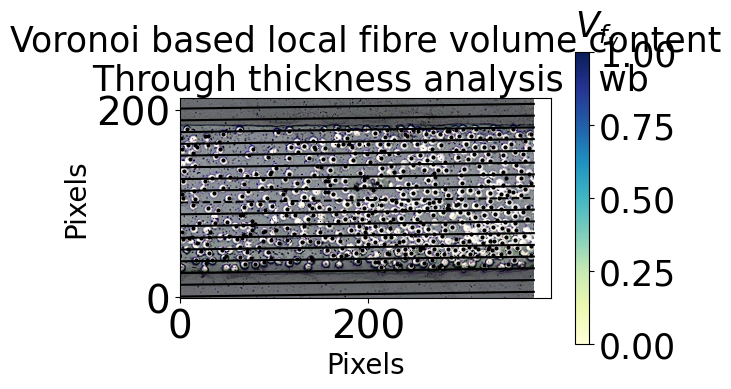

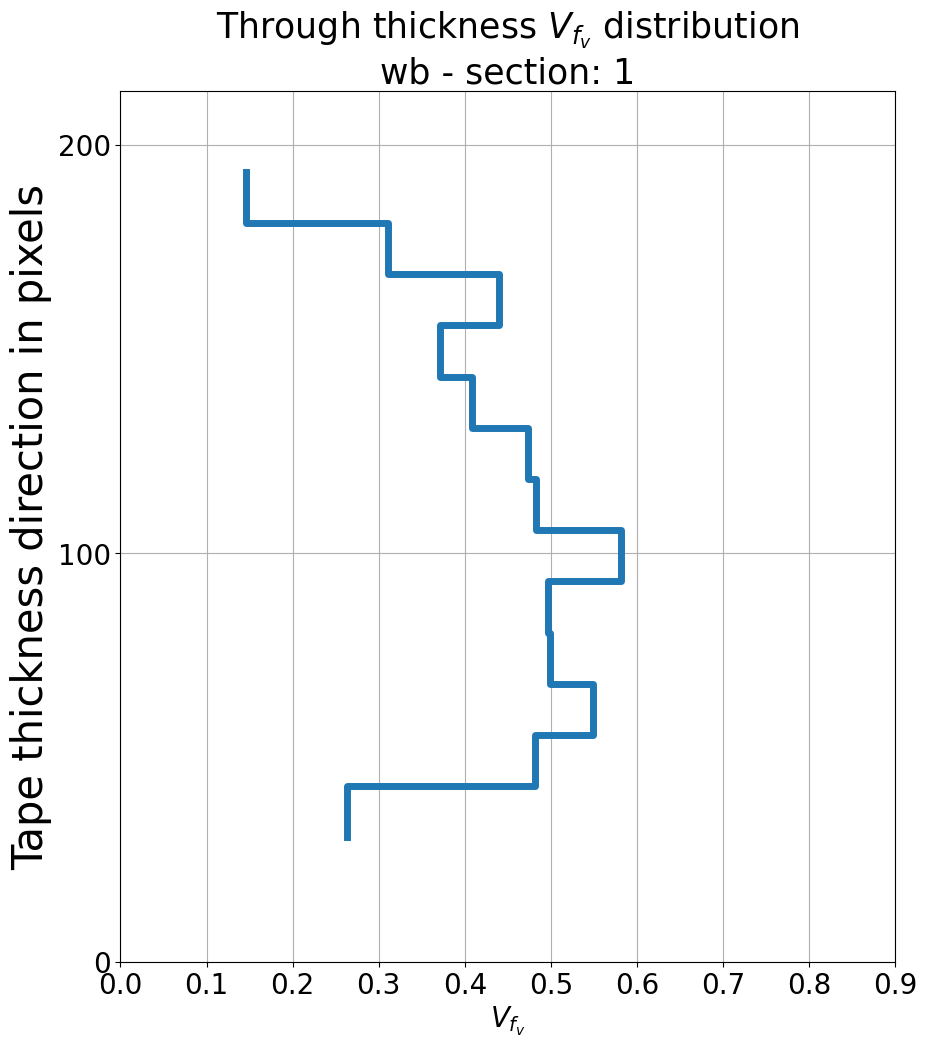

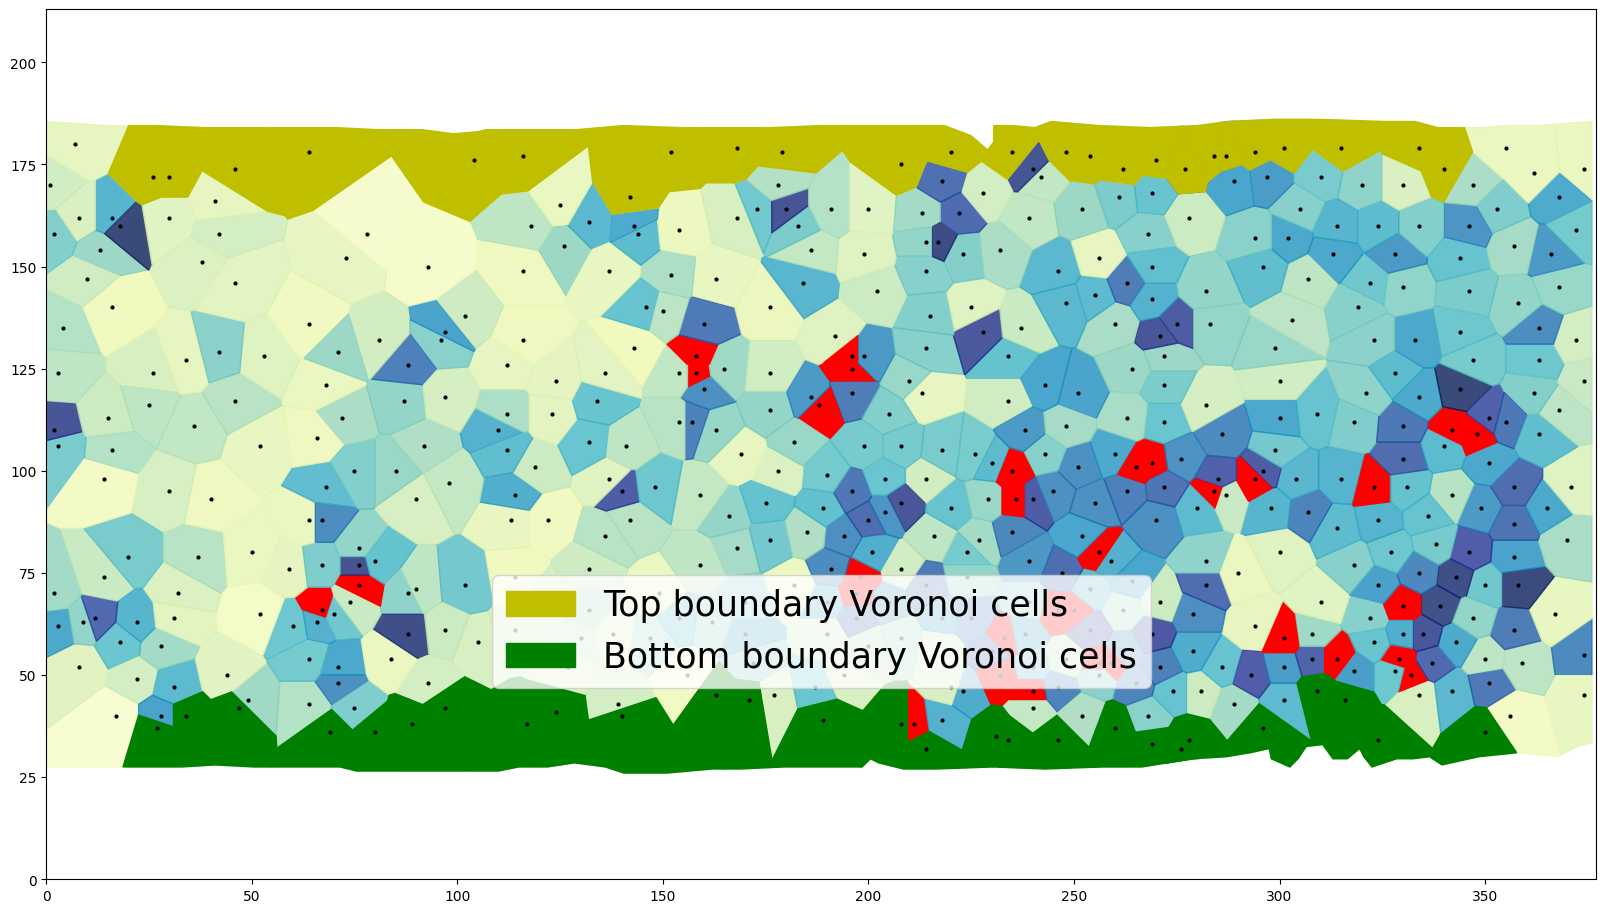

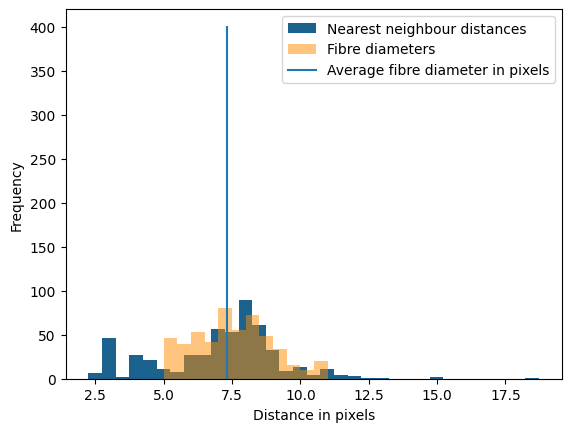

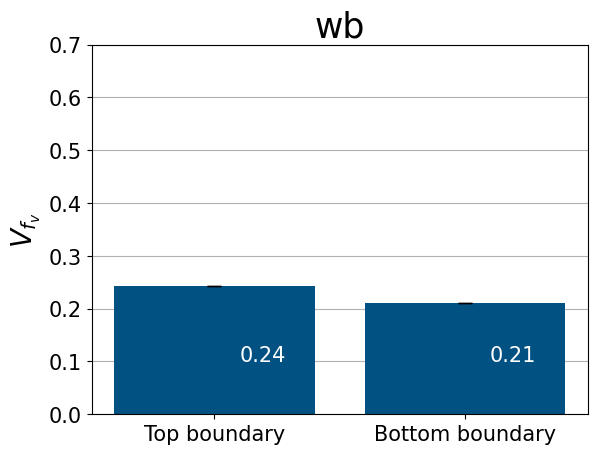

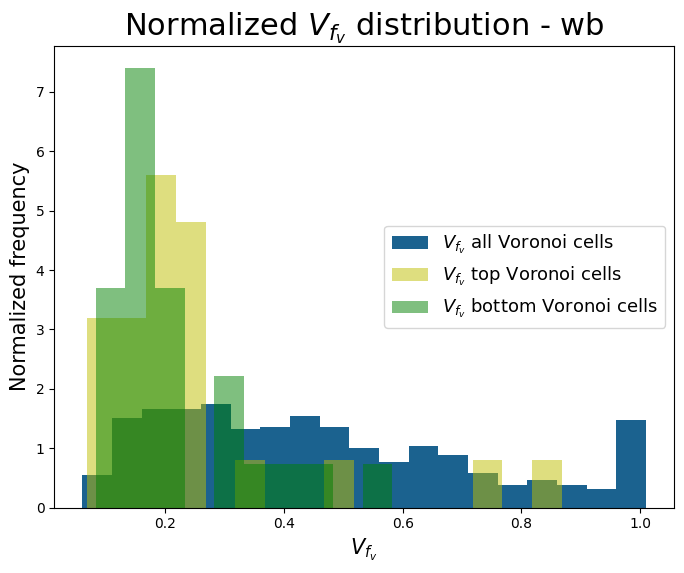

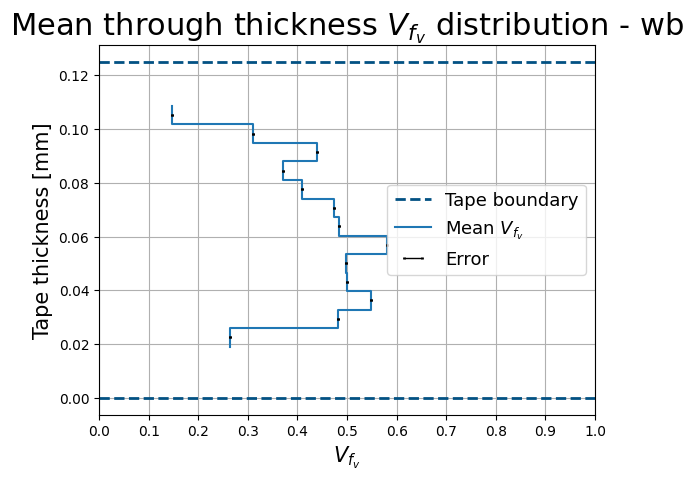

In [ ]:
Blue       = np.array([0.007, 0.317, 0.513])
LightBlue  = np.array([0    , 0.588, 0.862])
Cyan       = np.array([0    , 0.882, 0.882])

#File location definition
#For the reference images, three types are included
#0 = cropped image with boundary, 1 = cropped image without boundary, 2 = simulated image
# =============================================================================
fileloc = 0
# =============================================================================

HorPixel = [377,397,800]              #Width  of micrograph sections in pixels
VerPixel = [213,129,600]              #Height of micrograph sections in pixels
segments = [17,17,27]                 #Amount of segments for thickness distribution
segments=segments[fileloc]
t_tape   = [0.125,0.125,0.150]        #Measured actual tape thickness
t_tape   = t_tape[fileloc]


T_ratio = 0.00055                     #Transformation between pixels and millimeters.
                                      #Depends on type of microscope and magnification used

#Windows folder names:
directory = ['/content/drive/MyDrive/filescolab/microstructure_characterisation/Data/Exp_wb','/content/drive/MyDrive/filescolab/microstructure_characterisation/Data/Exp_wob','/content/drive/MyDrive/filescolab/microstructure_characterisation/Data/Simu']
plotnames = ['wb','wob','simu']

if fileloc == 0:
    first_img = 1                     #First image number of sequence of images analysed
    last_img  = 1                     #Last  image number of sequence of images analysed
    blurkernel = 2                    #Blur kernel's square matrix size
    sp = 20                           #Mean shift spatial window radius
    sr = 20                           #Mean shift spatial color radius
    MinDistLocMax = 2                 #Min separation distance of fibres
    Grey_offset = 50                  #Delta grey value representing fibre region
    Rmax = 5.0                        #Maximum specified fibre radius

if fileloc == 1:
    first_img = 1
    last_img  = 1
    blurkernel = 2
    sp = 20
    sr = 20
    MinDistLocMax = 2
    Grey_offset = 50
    Rmax = 5.0

if fileloc == 2:
    first_img = 1
    last_img  = 1
    blurkernel = 2
    sp = 200
    sr = 200
    MinDistLocMax = 100
    Grey_offset = 10
    Rmax = 90.0

#List of image numbers for layout purposes
number = []
for i in np.arange(first_img,last_img+1,1):
    number.append(f'{i}')

#List of Excel file names for boundary polygons
BoundCorFile = []
for i in np.arange(first_img,last_img+1,1):
    BoundCorFile.append(f'BoundCor_{i}')

HorPixel = HorPixel[fileloc]
VerPixel = VerPixel[fileloc]

# Midline coordinates definition to determine the skewed lines, are different per UD tape because each micrographs is positioned differently
# Image coordinates for determining inclination of segments - data A
if fileloc == 0:
    Y8_L =  VerPixel - 112
    Y8_R =  VerPixel - 112
    Y9_L =  Y8_R
    Y9_R =  VerPixel - 112
    Y10_L = Y9_R
    Y10_R = VerPixel - 112
    Y11_L = Y10_R
    Y11_R = VerPixel - 112
    Y12_L = Y11_R
    Y12_R = VerPixel - 107
    Y13_L = Y12_R
    Y13_R = VerPixel - 107
    Y14_L = Y13_R
    Y14_R = VerPixel - 107
    Y15_L = Y14_R
    Y15_R = VerPixel - 107
    Y16_L = Y15_R
    Y16_R = VerPixel - 107
    Y17_L = Y16_R
    Y17_R = VerPixel - 107
    Y18_L = Y17_R
    Y18_R = VerPixel - 107
    Y19_L = Y18_R
    Y19_R = VerPixel - 107

    Y_midline = [[Y12_L,Y12_R],[Y15_L,Y15_R],[Y16_L,Y16_R],[Y17_L-4,Y17_R-4],[Y18_L+5,Y18_R+5],[Y19_L,Y19_R]]

if fileloc == 1:
# Image coordinates for determining inclination of segments - data B
    Y8_L =  VerPixel - 52
    Y8_R =  VerPixel - 57
    Y9_L =  Y8_R
    Y9_R =  VerPixel - 52
    Y10_L = Y9_R
    Y10_R = VerPixel - 52
    Y11_L = Y10_R
    Y11_R = VerPixel - 52
    Y12_L = Y11_R
    Y12_R = VerPixel - 57
    Y13_L = Y12_R
    Y13_R = VerPixel - 57
    Y14_L = Y13_R
    Y14_R = VerPixel - 57
    Y15_L = Y14_R
    Y15_R = VerPixel - 57
    Y16_L = Y15_R
    Y16_R = VerPixel - 57
    Y17_L = Y16_R
    Y17_R = VerPixel - 57
    Y18_L = Y17_R
    Y18_R = VerPixel - 57
    Y19_L = Y18_R
    Y19_R = VerPixel - 57

    Y_midline = [[Y12_L,Y12_R],[Y15_L,Y15_R],[Y16_L,Y16_R],[Y17_L-4,Y17_R-4],[Y18_L+5,Y18_R+5],[Y19_L,Y19_R]]

if fileloc ==2:
# Image coordinates for determining inclination of segments - data C
    Y2_L = VerPixel - 246
    Y2_R = VerPixel - 231
    Y3_L = Y2_R
    Y3_R = VerPixel - 213
    Y4_L = Y3_R
    Y4_R = VerPixel - 192
    Y5_L = Y4_R
    Y5_R = VerPixel - 175
    Y6_L = Y5_R
    Y6_R = VerPixel - 156
    Y7_L = Y6_R
    Y7_R = VerPixel - 148

    Y_midline = [[Y2_L,Y2_R],[Y3_L,Y3_R],[Y4_L,Y4_R],[Y5_L,Y5_R],[Y6_L+5,Y6_R+5],[Y7_L,Y7_R]]

X_midline = [0,HorPixel]              #Horizontal coordinates for defining skewed lines

# ================================================================================
# ================================================================================
# # FUNCTION BLOCKS
# ================================================================================
# ================================================================================

# ================================================================================
# Function to extract boundary points from excel file
# ================================================================================
def TapeBoundaryExtraction(BoundCorFile):
    """
    Input:  BoundCorFile;             Excel sheet with boundary location coordinates
    Output: boundary;                 List of boundary location coordinates from Excel
    """
    #Opening Excel file with active sheet of boundary x-, y-coordinates
    book = openpyxl.load_workbook(directory[fileloc]+'/01-Coordinates/'+BoundCorFile[q]+'.xlsx')
    sheet2 = book.active

    #Extract boundary coordinates (x,y data) from BoundCor Excel sheet, ignore first row because of ImageJ output
    BoundaryCoordinates = []
    for row_j in range(2,sheet2.max_row+1):
        x = float(sheet2.cell(row=row_j,column=2).value)
        y = float(sheet2.cell(row=row_j,column=3).value)
        BoundaryCoordinates.append([x,(VerPixel-y)])
    BoundaryCoordinates = np.asarray(BoundaryCoordinates)

    #Create polygon from all imported boundary coordinates
    boundary = Polygon(BoundaryCoordinates)

    return boundary

# =============================================================================
# Function to extract fibre location from micrograph
# =============================================================================
def FibreLocExtraction(image):
    """
    Input:  image;                    Input micrograph

    Output: coordinates_full          List with x- and y-coordinates of detected fibre centres
    """
    #Input image
    image = cv2.flip(image,0)
    #Mean shift filter
    shifted = cv2.pyrMeanShiftFiltering(image, sp, sr)
    #Blur applied
    blur = cv2.blur(shifted,(blurkernel,blurkernel))
    #Gray scaling
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    #Binary + Otsu thresholding
    thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    #Compute the exact Euclidean distance from every binary pixel to the nearest zero pixel, then find peaks in this distance map
    D = ndimage.distance_transform_edt(thresh)
    localcoordinates = peak_local_max(D, min_distance=MinDistLocMax,labels=thresh)
    localMax = np.zeros_like(D, dtype=bool)
    localMax[tuple(localcoordinates.T)] = True

    #Perform a connected component analysis on the local peaks, using 8-connectivity, then appy the Watershed algorithm
    markers = ndimage.label(localMax, structure=np.ones((3,3)))[0]
    labels = watershed(-D, markers, mask=thresh) #-D is used because the watershed function uses local minima, instead of local maxima

    x_lst = []; y_lst = []; r_lst=[]; coordinates = []

    #Loop over the unique labels returned by the Watershed algorithm
    for label_it in np.unique(labels):
    #If the label is zero, we are examining the 'background', so simply ignore it
        if label_it == 0:
            continue
    # otherwise, allocate memory for the label region and draw it on the mask
        else:
            mask = np.zeros(gray.shape,dtype= "uint8")
            mask[labels == label_it] = 255 #Set color of this object to white.
            #Find contours based on label mask
            cnts = cv2.findContours(mask.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
            cnts = imutils.grab_contours(cnts)
            #Extract largest contour from cnts based on area calculation
            c = max(cnts,key=cv2.contourArea)
            #Draw a circle enclosing the object
            ((x,y),r) = cv2.minEnclosingCircle(c)

            x_lst.append(x); y_lst.append(y); r_lst.append(r)
            coordinates.append([x,y])
    coordinates = np.asarray(coordinates)
    near_distance = np.zeros((len(coordinates),5))

    #Proximity analysis
    adapt = []

    for i in range(len(coordinates)):

        #Defines the point for which its nearest neighbour is found
        base_point = coordinates[i]
        #Removes the base point from the coordinates array to prevent false detection
        coordinates = np.delete(coordinates,i,axis=0)
        #Distance between base point and its nearest neighbour (NN) fibre {0 = distance, 1 = index of point}
        near_distance[i][0] = NearestFibre(coordinates,base_point)[0]
        near_point_index    = NearestFibre(coordinates,base_point)[1]
        if near_distance[i][0] <= MinDistLocMax:
            adapt.append((i,base_point[0],base_point[1],coordinates[near_point_index][0],coordinates[near_point_index][1]))

        #Restore original coordinates list for next iteration
        coordinates = np.insert(coordinates,i,base_point,axis=0)
    adapt = np.asarray(adapt)

    #Loop to combine two detected points which are closer to each other than MinFibRadius to one single coordinate(fibre)
    created_coords = []
    for i in range(len(adapt)):
        x_new = (adapt[i][1]+adapt[i][3]) /2
        y_new = (adapt[i][2]+adapt[i][4]) /2
        created_coords.append((x_new,y_new))

    #Remove duplicate points
    created_coords = np.asarray(list(dict.fromkeys(created_coords)))

    #Remove base points with NN < MinRadius from coordinates list...
    if len(adapt)!= 0:
        indices = adapt[:,0]
        coordinates_new = np.asarray([e for i, e in enumerate(coordinates) if i not in indices])
        #... and combine with custom defined coordinates
        coordinates_full = np.concatenate((coordinates_new,created_coords),axis=0)
    else:
        coordinates_full = coordinates

    return coordinates_full,r_lst

# =============================================================================
# Function to define fibre radii based on micrograph
# =============================================================================
def FibreRadiusCalc(coordinates,boundary):
    """
    Input:  coordinates;              List with x- and y-coordinates of detected fibre centers
            boundary                  Boundary polygon
    Output: coordinates_full          List with x- and y-coordinates of fibre centres
    """
    #Find fibre coordinates which are Not In Polygon (nip)
    nip = []
    for i in range(len(coordinates)):
            if boundary.contains(Point(coordinates[i])) == False:
                nip.append(i)
    coordinates_inpoly = np.asarray([e for i, e in enumerate(coordinates) if i not in nip])

    #Grey transfrom of input micrograph
    imgGrey = cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),0)

    #Define the four radii, and consequently the average R.
    Fibre_data  = []
    for i in range(len(coordinates_inpoly)):
        x_centre = int(np.round(coordinates_inpoly[i][0]))
        y_centre = int(np.round(coordinates_inpoly[i][1]))
        R_left   = Radius_left(y_centre,x_centre,imgGrey)
        R_right  = Radius_right(y_centre,x_centre,imgGrey)
        R_top    = Radius_top(y_centre,x_centre,imgGrey)
        R_bot    = Radius_top(y_centre,x_centre,imgGrey)
        R_lst= [R_left,R_right,R_top,R_bot]
        count = len([i for i in R_lst if i < 1.5])

        if count >= 3:
            continue
        R_avg = (R_left+R_right+R_top + R_bot)/4
        if R_avg < 2.5:
            continue
        else:
            Fibre_data.append([x_centre,y_centre,R_avg])

    Fibre_data = np.asarray(Fibre_data)

    return coordinates_inpoly,Fibre_data

# ================================================================================
# Function to finitise the voronoi vertices which are at infinity
# 'Code to finitise Voronoi cells obtained (and modified) from: Stackoverflow.com'
# ================================================================================
def voronoi_finite_polygons_2d(vor):
    """
    Input:  vor;                      Voronoi Diagram of coordinates
    Output: new_regions;              List of inidices of (new) Voronoi vertices
            new_vertices;             List of initial Voronoi vertex coordinates (x,y) with new vertices added at a finite distance added to the end of the list.
    """
    #Empty list for the new regions and copy array of 'old' vertices to a new list
    new_regions = []
    new_vertices = vor.vertices.tolist()

    #Center vector, mean of x- and y-coordinate of input coordinates
    center   = vor.points.mean(axis=0)
    #Radius distance of 2x (amx fibre x-,y-coordinate) for calculation to make inifite Voronoi vertices finite
    # dist     = 2*vor.points.ptp().max()
    dist = 2 * np.ptp(vor.points, axis=0).max()


    """
    vor.ridge_points => array ([N*[]]) where N = number of Voronoi ridges (lines), Voronoi ridge is always perpendicular to a line drawn between two input points. [Ppoint1,Ppoint2] Defines between which input points the Voronoi ridge is 90 deg.

    vor.ridge_vertices => list of tuples [N*[]] where N = number of Voronoi vertices. [Vpoint1,Vpoint2] defines indices of Voronoi vertices defining each Voronoi ridge, -1 index defines point at infinity.

    The for loop below defines N*[p1,p2,v1,v2] where N = number of input points and creates dictionary item for each input point, p1 (and second input point, p2) where v1 and v2 represent the Voronoi vertex indices of the Voronoi ridge (perpendicular to line drawn between p1 and p2 input points) vertices
    """
    #Empty dictionary for Voronoi ridges
    all_ridges = {}
    #Append point1 and corresponding p2 with v1 and v2, also append p2 and corresponding p1 with v1 and 2
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    #Reconstruct infinite regions, point_region: python list with cell indices
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]  #list with indices corresponding to cell

        #When all indices >=0 -> no inifinite points -> finite area, append Voronoi vertices to the list of 'new' regions
        if all(Vor_index >= 0 for Vor_index in vertices):
            new_regions.append(vertices)
            continue

        #Indices not all >0 -> make Voronoi vertices finite
        ridges = all_ridges[p1]          # Extract p1 related data from dictionary

        #ridges does contain multiple p1,p2,v1,v2 combinations, filters out the finite regions with same p1 where v1 and v2 >0
        new_region = [v for v in vertices if v >= 0]

        #When v2 is the -1 Voronoi vertex, swap with v1 to make v1 leading variable for Vertex at inifinity. If v2 >= 0 and v1 >=1, this ridge is already in the new_region list
        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue

            #v1 Is the point at infinity and must become finite. Define tangent vector between p1 and p2 with ((Xp2 - Xp1), (Yp2-Yp1) = (Xt,Yt))
            t = vor.points[p2] - vor.points[p1]

            #Normalise tangent vector by means of t / sqrt(Xt^2+Yt^2)
            t = t / np.linalg.norm(t)
            #Define normal vector of t
            n = np.array([-t[1], t[0]])

            #Define midpoint between p1 and p2 input coordinates
            midpoint = vor.points[[p1, p2]].mean(axis=0)

            #Vector of normal vector times sign dot product between midpoint and centre vector
            direction = np.sign(np.dot(midpoint - center, n)) * n

            #Finite point is defined based on coordinates of Voronoi vertex (v2) and direction vector * radius distance
            fin_point = vor.vertices[v2] + (direction * dist)

            #The length of new_vertices list determines the new Voronoi vertex index
            new_region.append(len(new_vertices))

            #Appends new finite Voronoi vertex coordinates to list of original Voronoi vertex coordinates (extends the original list)
            new_vertices.append(fin_point.tolist())

        #New Voronoi vertex coordinates (x,y) array (with originial finite Voronoi indices plus the corresponding 'new' fin_point coordinates ([N*[x,y]]) where N = number of Voronoi vertices of specific cell)
        vs = np.asarray([new_vertices[v] for v in new_region])


        #Average vector of all Voronoi vertex coordinates
        c = vs.mean(axis=0)
        #Subtract mean from vectors from vs array and define angle between horizontal axis and calculated mean vector
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])

        #Sort angles counter clock-wise
        new_region = np.array(new_region)[np.argsort(angles)]

        #Append new region to array of all regions ('new_regions')
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

# ================================================================================
# Function for polygon modification according to specified boundary and polygon
# plots with color plot specified according to local Vfv
# ================================================================================
def PolygonModification(regions,vor,vertices,radius_lst):
    """
    Input:  regions;                  Finitised voronoi regions
            vor;                      Voronoi pattern applied to the input coordinates
            vertices;                 Array of all Voronoi vertices (incl modified)
            radius_lst;               List with individual fibre diameters
    Output: norm;                     Normalised color map between 0 and 1
            Local_FibVol2;            Local Vfv values of each Voronoi cell
            Area_nett2;               List with nett areas of all Voronoi cells
            Elst;                     List summation of errorneous Vfv cells
            BoundCell;                List with CN's of Voronoi cells intersecting micrograph boundary
            BoundPoly;                List with polygons of Voronoi cells intersecting micrograph boundary
    """

    Elst           = [ ]
    Area           = [ ]                    #List for area values (unsorted areas)
    Avor_bound     = [ ]                    #Voronoi areas of boundary polygons
    Area_ordered2  = [0]*len(regions)       #list of areas orderd by CN number
    Area_nett2     = [0]*len(regions)       #List for nett areas (Acell-Afib)
    Local_FibVol2  = [0]*len(regions)       #Vfv ratio of Voronoi cell
    n= 0                                    #Counter definition
    radius_lst_ordered = [0]*len(regions)   #List for radii (ordered acc. to CN)

    #Normalise data from 0 to 1 without clipping (for cells with Vfv out-of-range)
    norm = mpl.colors.Normalize(vmin=0, vmax=1.0, clip=False)

    #Map color scale based on norm and color scheme
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.YlGnBu)
    #Define figure and size based on pixel ratio (+title of window)
    plt.figure('Voronoi Diagram section '+number[q],figsize=(20,(VerPixel/HorPixel*20)))

    #Boundary intersection check:
    BoundCell =[]; BoundPoly=[]

    #Region are the Voronoi indices of a specific cell, CN is the cell number
    for i, (region, CN) in enumerate(zip(regions, vor.point_region)):

        A_fib = (np.pi * (radius_lst_ordered[CN])**2 )
        #Vertices[region] gives the x,y-coordinates of voronoi vertices
        polygon = vertices[region]

        #Poly is a polygon constructed from the coordinates specified by polygon
        poly = Polygon(polygon)

        #Transform polygon 'old' coordinates from x y, x y .. to (x,y),(x,y)..etc.
        poly_old = [p for p in poly.exterior.coords]

        #If poly intersects with boundary, polygon vertex coordinates are changed
        poly = poly.intersection(boundary)

        if poly.geom_type == 'MultiPolygon':
            #Transform second polygon 'new' coordinates from x y, x y .. to (x,y),(x,y)..etc.
            poly_new = [p for p in poly[0].exterior.coords]
        elif poly.geom_type == 'GeometryCollection':
            poly_new = [p for p in poly[1].exterior.coords]
        else:
            #Transform polygon 'new' coordinates from x y, x y .. to (x,y),(x,y)..etc.
            poly_new = [p for p in poly.exterior.coords]

 	    #Calculate area of poly_new (modified polygon or not)
        Area.append(ConvexHull(poly_new).volume)

        #Area, radii, A_fib and Nett area lists ordered with CN as leading variable
        Area_ordered2[CN]      = Area[i]
        radius_lst_ordered[CN] = radius_lst[i]
        A_fib                  = float((np.pi * (radius_lst_ordered[CN])**2 ))
        Area_nett2[CN]         = Area_ordered2[CN] -  A_fib

        #Colorise polygon based on the Vfv and the color scale mapper, if statement is used to correct cells with 1 < Vfv < 0
        if Area_nett2[CN] < 0:
            plt.fill(*zip(*poly_new), color='r',alpha=1,linewidth=1.0,linestyle='-',closed=False)
            Elst.append(Area_nett2[CN])
            #Set local Vfv to 1 to neglect incorrect data values
            Local_FibVol2[CN] = 1
        else:
            Local_FibVol2[CN] = A_fib / Area_ordered2[CN]
            plt.fill(*zip(*poly_new), color=mapper.to_rgba(Local_FibVol2[CN]), alpha=0.8, linewidth = 1.0, linestyle = '-',closed = False)
        n = n+1

        #Statement to check whether or not the polygon is modified due to boundary intersections
        if np.round(ConvexHull(poly_old).volume,4) != np.round(ConvexHull(poly_new).volume,4):
            BoundCell.append(CN)
            BoundPoly.append(poly_new)
            Avor_bound.append(Area_ordered2[CN] -  A_fib)




    return norm, Area,Local_FibVol2,Area_nett2,Elst,BoundCell,BoundPoly,Avor_bound

# ================================================================================
# Function to plot additional elements to Voronoi diagram
# ================================================================================
def VoronoiPlot(coordinates,Fibre_data,Acoff,Bcoff,vor,Area,norm,HorPixel,VerPixel):
    """
    Input:  coordinates;              Input fibre location coordinates
            Fibre_data;               Input fibre array for plotting
            Acoff, Bcoff;             Coefficients for calculating segment lines
            vor;                      Voronoi pattern applied to the input coordinates
            Area;                     List with areas of all polgyon shapes
            norm;                     Normalised color map between 0 and 1
            HorPixel;                 Image size width in pixels
            VerPixel;                 Image size height in pixels
    Output: DisList;                  List with CN, Vor. cell number, y-coordinate, cell area
            deltri_area;              Area list of Delaunay triangles
    """
    # Plot original fibre locations as dots in same figure
    plt.plot(Fibre_data[:, 0], Fibre_data[:, 1], 'ko',markersize = 2)

    #DisList is a matrix with: [Input coordinate number, CN, input y-coordinate, area Vor. cell, input x-coordinate]
    DisList = np.zeros((len(Fibre_data),5))
    m = 0
    for i in (vor.point_region):
        DisList[m,0] = m                        # Number of input coordinate
        DisList[m,1] = i                        # Number of corresponding Voronoi Cell
        DisList[m,2] = Fibre_data[m][1]         # Y-coordinate of input coordinate
        DisList[m,3] = Area[m]                  # Area of Voronoi cell
        DisList[m,4] = Fibre_data[m][0]         # X-coordinate of input coordinate
        m = m+1

    #Load and display actual image behind Voronoi diagram
    plt.xlim(0, HorPixel)                             #Set limits of x- and y-axis
    plt.ylim(0, VerPixel)
    img_file = directory[fileloc]+'/02-Images/'+number[q]+'.png'
    img = plt.imread(img_file)

    # modify by ChatGPT
    # Create a figure and axis for imshow
    fig, ax = plt.subplots()
    ax.imshow(img[::-1], origin='lower', cmap=plt.cm.gray)

    # Plot original fibre locations on the same axis
    ax.plot(Fibre_data[:, 0], Fibre_data[:, 1], 'ko', markersize=2)

    # Plot preparation
    ax.set_title('Voronoi based local fibre volume content - '+plotnames[fileloc], fontsize=25)
    ax.set_xlabel('Pixels', fontsize=20)
    ax.set_ylabel('Pixels', fontsize=20)
    ax.tick_params(axis='both', labelsize=28)

    cb = fig.colorbar(cm.ScalarMappable(norm=norm,cmap=cm.YlGnBu),ax=ax,shrink=0.65)
    cb.ax.tick_params(labelsize=25)
    cb.ax.text(0.0, 1.05, r'$ V_{f_{v}}$', rotation=0, fontsize=25)

    # # Original code
    # plt.imshow(img[::-1],origin = 'lower',cmap = plt.cm.gray)
    # #Plot preparation
    # plt.title('Voronoi based local fibre volume content - '+plotnames[fileloc],fontsize=25)
    # plt.xlabel('Pixels',fontsize=30)
    # plt.ylabel('Pixels',fontsize=30)
    # plt.xticks(fontsize=28)
    # plt.yticks(fontsize=28)
    # cb = plt.colorbar(cm.ScalarMappable(norm=norm,cmap=cm.YlGnBu),ax=None,shrink=0.65)
    # cb.ax.tick_params(labelsize=25)
    # ax = cb.ax
    # ax.text(0.0,1.05,r'$ V_{f_{v}}$',rotation=0,fontsize=25)

    #Segmental distribution of micrographs
    t = VerPixel                      #Total height of micrograph
    dt = t/segments                   #Thickness of one segment
    midpoint = int(segments/2)

    # Save the first plot
    plt.tight_layout()
    plt.savefig(directory[fileloc]+'/03-plots/VoronoiDiagram_'+plotnames[fileloc]+'_'+number[q]+'.png', format='png',dpi=50)

    #From midpoint on, for each iteration there will be a paralel line drawn at distance -k*dt and +k*dt from the mid-line
    for k in range(midpoint+1):
        Yleft_bot  = Acoff * 0 + Bcoff - k * dt
        Yleft_top  = Acoff * 0 + Bcoff + k * dt
        Yright_bot = Acoff * HorPixel + Bcoff - k * dt
        Yright_top = Acoff * HorPixel + Bcoff + k * dt

        if k == 0:
            plt.plot(X_midline,(Yleft_bot,Yright_bot),linestyle='--',color = 'black')
        else:
            plt.plot(X_midline,(Yleft_bot,Yright_bot),color = 'black')
            plt.plot(X_midline,(Yleft_top,Yright_top),color = 'black')

    # Update the title and save the second plot
    plt.title('Voronoi based local fibre volume content\n Through thickness analysis - '+plotnames[fileloc],fontsize=25)
    plt.tight_layout()
    plt.savefig(directory[fileloc]+'/03-plots/VoronoiDiagram_'+plotnames[fileloc]+'_'+number[q]+'_skewlines.png', format='png',dpi=50)

    return DisList

# ================================================================================
# Function to plot the Voronoi pattern over actual image, including fib/res
# distribution expressed as color map
# ================================================================================
def VorDistributionPlot(VerPixel,segments,DisList,Fibre_data):
    """
    Input:  Fibre_data;              Input fibre location coordinates
            vor;                      Voronoi pattern applied to the input coordinates
            Area;                     List with areas of all polgyon shapes
            norm;                     Normalised color map between 0 and 1
            VerPixel;                 Image size height in pixels
            segments;                 Amount of segments sections through thickness
            DisList;                  List with CN, Vor. cell number, y-coordinate, cell area
            D_fib;                    Measured fibre diameter (CONSTANT A NOT USED ANYMORE)
    Output: FibVol_dbl;               List with fib/res distribution through thickness
            Loc_FibVol_lst_avg;       Average Vfv per thickness segment
    """
    t = VerPixel
    dt = t/segments
    #Thickness distribution points, n segment means n+1 edge points
    Td = np.zeros((1,segments+1))

    #List (one for each segment) with local Vfv, and list for avg segment value
    Loc_FibVol_lst     = [[] for _ in range(segments)]
    Loc_FibVol_lst_avg = [[] for _ in range(segments)]

    # count loops from 0 to len(DisList[:,2]), Y is each input y-coordinate
    for count , Y in enumerate(DisList[:,2]):
        X = DisList[count,4]
        midpoint = int(segments/2)
        #Define segment distribution coordinates, the top and bottom y-coordinate of a section are x-coordinate dependent due to the skewness of the lines
        for i in range(midpoint+1):
            Td[0,midpoint-i] = Acoff*X+Bcoff - i * dt
            Td[0,midpoint+i] = Acoff*X+Bcoff + i * dt
        #Define left and boundary of specific thickness segment
        for n in range(segments):
            left  = Td[0,n]
            right = Td[0,n+1]
            #Check in which segment the y-coordinate falls
            if Y >=left and Y< right:
                Vfv = (np.pi*(Fibre_data[count,2])**2)/DisList[count,3]
                if Vfv > 1:
                    # print(Vfv)
                    Vfv = 1
                Loc_FibVol_lst[n].append(Vfv)      #append the cross-sectional area of the fibre divided by the area of the voronoi cell
                #If segment found, break for loop to speed up calculation
                break
    #For segmental plot, twice each value needed (except edge values)
    Td_dbl = []; FibVol_dbl = []

    #Prepare double thickness distribution coordinates list
    for i in range(segments):
        Loc_FibVol_lst_avg[i] = np.mean(Loc_FibVol_lst[i])
        FibVol_dbl.append(Loc_FibVol_lst_avg[i])
        FibVol_dbl.append(Loc_FibVol_lst_avg[i])
        Td_dbl.append(Td[0][i])
        Td_dbl.append(Td[0][i])
    Td_dbl.append(Td[0][i+1]); Td_dbl.append(Td[0][i+1])
    Td_dbl = Td_dbl[1:-1]

    #Plotting commands
    fig = plt.figure(number[q],figsize=(20*0.5,(VerPixel/HorPixel*20)))
    ax = fig.add_subplot(111)
    plt.title('Through thickness $V_{f_{v}}$ distribution\n'+plotnames[fileloc]+' - section: '+number[q],fontsize=25)
    plt.plot(FibVol_dbl,Td_dbl, label = 'Fiber-Resin Ratio',linewidth=5); plt.grid(True)
    plt.xlabel('$V_{f_{v}}$',fontsize=20)
    plt.ylabel('Tape thickness direction in pixels',fontsize=30)
    plt.yticks(np.arange(0,VerPixel,100))
    plt.xticks(np.arange(0,1,0.1))
    plt.ylim(0,VerPixel)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.tick_params(axis='y', which='major', labelsize=20)
    plt.savefig(directory[fileloc]+'/03-plots/FibResDistribution'+number[q]+'_skew.png', format='png',dpi=200)

    return FibVol_dbl,Loc_FibVol_lst_avg,Loc_FibVol_lst


# ================================================================================
# Function which filters the polgyons which intersect with the defined boundary
# ================================================================================
def Polygon_edge_detection(BoundCell,DisList,HorPixel,VerPixel):
    #List Vfv values of Voronoi cells at top and bottom boundary
    Boundpoly_sel_top=[]; Boundpoly_sel_bot=[]
    BoundcellFR_top  =[]; BoundcellFR_bot  =[]
    TopboundArea = []; Bottomboundarea = []
    """
    Input:  BoundCell;                Input list with the Voronoi CN which intersects with the pre-defined boundary
            DisList;                  Matrix with x-,y-coordinates, CN's, Cell areas
            HorPixel;                 Width of input image in pixels
            VerPixel;                 Height of input image in pixels
    Output: avgFR_bound_top;          List with averaged FR ratio of top edge Voronoi cells
            avgFR_bound_bot;          List with averaged FR ratio of bot edge Voronoi cells
    """
    for count,i in enumerate(BoundCell): #Counter and i = Voronoi Cell number (CN)
        # Find location of index of the CN in the DisList matrix
        loc = np.where(DisList[:, 1] == i)[0]  # Use [0] to access the indices directly
        xpos = DisList[loc, 4][0]  # Access the value directly using indexing

        # loc = np.where(DisList[:,1] ==i)
        # xpos = np.asscalar(DisList[loc,4])      # Corresponding x-coordinate of CN
        #Neglect left and right boundary Vfv
        if 25 < xpos < HorPixel-25:
            ypos = DisList[loc, 2][0]
            # ypos = np.asscalar(DisList[loc,2])  # Corresponding y-coordinate of CN


            #Top boundary Vor. cells, based on y-coordinate and midline midpoint
            if ypos > np.mean(Y_midline[q]):
                Boundpoly_sel_top.append(BoundPoly[count])
                #Corresponding FR ratio of Voronoi cell appended to a list
                BoundcellFR_top.append(FR_lst[i])
                TopboundArea.append(DisList[loc,3])
            elif ypos < np.mean(Y_midline[q]):                  #Bottom equivalent
                Boundpoly_sel_bot.append(BoundPoly[count])
                BoundcellFR_bot.append(FR_lst[i])
                Bottomboundarea.append(DisList[loc,3])

    avgFR_bound_top.append(np.mean(BoundcellFR_top))
    avgFR_bound_bot.append(np.mean(BoundcellFR_bot))

    #Plotting commands
    plt.figure('Voronoi Diagram section '+number[q],figsize=(20,(VerPixel/HorPixel*20)))
    for i in range(len(Boundpoly_sel_top)):
        plt.fill(*zip(*Boundpoly_sel_top[i]),color='y')
        if i == len(Boundpoly_sel_top)-1:
            plt.fill(*zip(*Boundpoly_sel_top[i]),color='y',label='Top boundary Voronoi cells')

    plt.figure('Voronoi Diagram section '+number[q],figsize=(20,(VerPixel/HorPixel*20)))
    for i in range(len(Boundpoly_sel_bot)):
        plt.fill(*zip(*Boundpoly_sel_bot[i]),color='g')
        #To comply with desired legend
        if i == len(Boundpoly_sel_bot)-1:
            plt.fill(*zip(*Boundpoly_sel_bot[i]),color='g', label = 'Bottom boundary Voronoi cells')
    plt.legend(loc='lower center',bbox_to_anchor=(0.5,0.2),prop={'size':25})
    plt.savefig(directory[fileloc]+'/03-plots/VoronoiDiagram_EdgeDetection_'+number[q]+'_skew.png', format='png',dpi=50)


    return avgFR_bound_top, avgFR_bound_bot,TopboundArea,Bottomboundarea,BoundcellFR_top,BoundcellFR_bot

# ================================================================================
# Function to combine the individual FR ratios through thickness for each of
# the micrographs, to one single list
# ================================================================================
def VorDistributionPlot_Combined_data(FibRes):
    """
    Input:  FibRes;                   Input list with the local Vfv through thickness for each single microscopic sample

    Output: Mean_fr_ratio_NOnan;      List with average Vfv through thickness, nan's filtered out
            Mean_fr_ratio_NOnan_dbl;  Same list with all but first and last items twice for plotting purpose
            Std_fr_ratio_NOnan;       List with error values for Vfv calculation
            Ylst1;                    List with vertical position of thickness segments (not modified yet)
            Ylst2;                    List with vertical position for error bars (not modified yet)
    """
    #Provide average of Vfv in each segment of all micrographs
    Mean_fr_ratio = [np.nanmean(k) for k in zip(*FibRes)]
    #Not A Number (NAN) due to segments without fibres, each nan removed properly
    Mean_fr_ratio_NOnan = [x for x in Mean_fr_ratio if str(x) != 'nan']

    FR_segments = len(Mean_fr_ratio_NOnan)

    #For plotting purposes, append value twice
    Mean_fr_ratio_NOnan_dbl = np.repeat(Mean_fr_ratio_NOnan,2)

    #Error of Vfv of each individual thickness segment
    Std_fr_ratio  = [np.nanstd(k)  for k in zip(*FibRes)]
    Std_fr_ratio_NOnan = [x for x in Std_fr_ratio if str(x) != 'nan']

    #Ylst1 and Ylst2 used for plotting mean Vfv and std Vfv, respectively
    dt = VerPixel/segments
    Ylst = np.zeros(FR_segments+1)
    for i in range(FR_segments+1):
        Ylst[i] = dt*i*T_ratio
    Ylst1 = np.repeat(Ylst,2)
    Ylst1 = Ylst1[1:-1]

    Ylst2 = [x+((dt/2)*T_ratio) for x in Ylst]
    Ylst2 = Ylst2[:-1]

    return Mean_fr_ratio_NOnan,Mean_fr_ratio_NOnan_dbl,Std_fr_ratio_NOnan,Ylst1,Ylst2


# =============================================================================
# Function to present top and bottom boundary Vfv of tape.  #
# =============================================================================
def EdgeVfv_BarPlot(avgFR_bound_top_l,avgFR_bound_bot_l):
    """
    Input:  avgFR_bound_top_l;        List with averaged FR ratio of top edge Voronoi cells
            avgFR_bound_bot_l;        List with averaged FR ratio of bottom edge Voronoi cells

    Output: avgFR_bound_top_s;        Single scalar value for average Vfv of top boundary
            avgFR_bound_bot_s;        Single scalar value for average Vfv of bottom boundary
            Barplot average Vfv top versus bottom voronoi cells
            Normalized histogram distribution Vfv top boundary versus bottom boundary versus all voronoi cells
    """
    #Calculate avg and std of top and bottom lists
    avgFR_bound_top_s = np.mean(avgFR_bound_top_l)
    avgFR_bound_bot_s = np.mean(avgFR_bound_bot_l)
    stdFR_bound_top = np.std(avgFR_bound_top_l)
    stdFR_bound_bot = np.std(avgFR_bound_bot_l)
    print('std top =',stdFR_bound_top)
    print('std bot =',stdFR_bound_bot)

    #Plotting commands
    fig = plt.figure('Barplot Edge Voronoi Cells Intersecting With Boundary Polygon')
    ax = fig.add_subplot(111)
    plt.grid(axis='y',zorder=0)
    plt.bar(('Top boundary','Bottom boundary'),(avgFR_bound_top_s,avgFR_bound_bot_s),color=Blue,yerr=(stdFR_bound_top,stdFR_bound_bot),capsize=5)
    plt.ylabel('$V_{f_{v}}$',fontsize=20)
    plt.yticks(np.arange(0,0.7+0.1,0.1))
    plt.title(plotnames[fileloc],fontsize=25)
    ax.set_axisbelow(True)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.annotate((np.round(avgFR_bound_top_s,2)),xy=(0.1,0.1),color='white',fontsize=15)
    plt.annotate((np.round(avgFR_bound_bot_s,2)),xy=(1.1,0.1),color='white',fontsize=15)
    plt.savefig(directory[fileloc]+'/03-plots/Edge_FR_Ratio_'+plotnames[fileloc]+'.png', format='png',dpi=200)


    #Normalized V_f_v distribution over all micrographs, top vs bottom vs all voronoi cells
    binwidth2 = 0.05
    plt.figure('V_f_v histogram of voronoi cells (All, top and bottom)',figsize=(8, 6))
    plt.title('Normalized $V_{f_{v}}$ distribution - '+plotnames[fileloc],fontsize=22)
    plt.hist(Vfv_all,density=True,bins=np.arange(min(FR_lst),max(FR_lst)+binwidth2,binwidth2),color = Blue,label = '$V_{f_{v}}$ all Voronoi cells',alpha = 0.9)
    plt.hist(Vfv_top,density=True,bins=np.arange(min(BoundcellFR_top),max(BoundcellFR_top)+binwidth2,binwidth2),color = 'y',label = '$V_{f_{v}}$ top Voronoi cells',alpha = 0.5)
    plt.hist(Vfv_bot,density=True,bins=np.arange(min(BoundcellFR_bot),max(BoundcellFR_bot)+binwidth2,binwidth2),color = 'g',label = '$V_{f_{v}}$ bottom Voronoi cells',alpha = 0.5)
    plt.legend(loc='center right',prop={'size':13})
    plt.ylabel('Normalized frequency',fontsize=15)
    plt.xlabel('$V_{f_{v}}$',fontsize=15)
    plt.savefig(directory[fileloc]+'/03-plots/Vfv_histogram_distribution'+plotnames[fileloc]+'.png', format='png',dpi=200)

    return avgFR_bound_top_s, avgFR_bound_bot_s

# =============================================================================
# Function to plot the combined individual Vfv through thickness
# =============================================================================
def VorDistributionPlot_Combined_plot(avgFR_bound_top_s,avgFR_bound_bot_s,Ylst1,Ylst2,Mean_fr_ratio_NOnan_dbl):
    """
    Input:  avgFR_bound_top_s;        Single scalar value for average Vfv of top boundary
            avgFR_bound_bot_s;        Single scalar value for average Vfv of bottom boundary
            Ylst1;                    List with vertical position of thickness segments (not modified yet)
            Ylst2;                    List with vertical position for error bars (not modified yet)
            Mean_fr_ratio_NOnan_dbl;  List with (double) average Vfv through thickness, nan's filtered out

    Output: Combined Vfv plot through thicknes, scaled to Vfv bot,top ratio
    """
    #Define ratio between Vfv top and Vfv bottom edge
    ratio_total = avgFR_bound_top_s + avgFR_bound_bot_s
    ratio_bot   = avgFR_bound_top_s / ratio_total

    # Modified Ylst1 and Ylst2 for vertical shift according to tape thickness
    Ylst1_mod = [x + (t_tape-np.max(Ylst1))/2*ratio_bot*2 for x in Ylst1]
    Ylst2_mod = [x + (t_tape-np.max(Ylst1))/2*ratio_bot*2 for x in Ylst2]

    #Plotting commands
    plt.figure('Combined Tape Sections')
    plt.plot((0,HorPixel),(t_tape,t_tape),linewidth=2,linestyle='--',color=Blue,label='Tape boundary')
    plt.plot(Mean_fr_ratio_NOnan_dbl,(Ylst1_mod),label='Mean $V_{f_{v}}$')
    plt.plot((0,HorPixel),(0,0),linewidth=2,linestyle='--',color=Blue)
    plt.xlim(0.0,1.0)
    plt.xticks(np.arange(0.0, 1.1,0.1))
    plt.errorbar(Mean_fr_ratio_NOnan,(Ylst2_mod), xerr=Std_fr_ratio_NOnan,ls= 'none',c='black',capsize=1, elinewidth=1, markeredgewidth=2,label='Error')

    plt.title('Mean through thickness $V_{f_{v}}$ distribution - '+plotnames[fileloc],fontsize=22)
    plt.xlabel('$V_{f_{v}}$',fontsize=15)
    plt.ylabel('Tape thickness [mm]',fontsize=15)
    plt.grid()
    plt.legend(loc = 'center right',prop={'size': 13})
    plt.savefig(directory[fileloc]+'/03-plots/FiberResinDistribution_Combinedsections'+plotnames[fileloc]+'.png', format='png',dpi=200)

    return

# =============================================================================
# Function to find the nearest neighbour distance of a fibre
# =============================================================================
def NearestFibre(search_fibres,base_fibre):
    """
    Input:  search_fibres;            Cloud of fibres in which the NN of the base point is determined
            base_fibre;               Base point fibre

    Output: distance;                 Output NN distance (index 0) and NN fibre index (index 1)
    """
    Tree = cKDTree(search_fibres)
    distance = Tree.query(base_fibre)

    return distance

# =============================================================================
# Function to determine the NN of each individual fibre
# =============================================================================
def NN_histogram_data(coordinates,radius_lst):
    """
    Input:  coordinates;              List of fibre coordinates
            radius_lst;               List of individual fibre radii

    Output: near_distance[:,0];       List of NN distance values of all fibres
    """
    #Create zeroes matrix for [distance, x-coordinate base_point, y-coordinate base_point, x-coordinate found_point, y-coordinate found_point]
    near_distance = np.zeros((len(coordinates),5))
    close_count = 0

    for i in range(len(coordinates)):

        #Defines the point for which its nearest neighbour is found
        base_point = coordinates[i]
        #Removes the base point from the coordinates array to prevent false detection
        coordinates = np.delete(coordinates,i,axis=0)

        #Distance between base point and its nearest neighbour fibre {0 = distance, 1 = index of point}
        near_fibre = NearestFibre(coordinates,base_point)
        near_distance[i][0] = NearestFibre(coordinates,base_point)[0]
        near_distance[i][1] = base_point[0]
        near_distance[i][2] = base_point[1]
        near_distance[i][3] = coordinates[near_fibre[1]][0]
        near_distance[i][4] = coordinates[near_fibre[1]][1]

        if near_distance[i][0] < (2*radius_lst[i]):
            close_count+=1

        #Restore original coordinates list for next iteration
        coordinates = np.insert(coordinates,i,base_point,axis=0)

    return near_distance[:,0]

# =============================================================================
# Function to visualize the NN and fibre radii distribution using a histogram F
# =============================================================================
def NN_histogram_plot(NearestNeighbour_lst,R_fibres_lst):
    """
    Input:  NearestNeighbour_lst;     Cloud of fibres in which the NN of the base point is determined
            R_fibres_lst;             Base point fibre

    Output: NN histogram plot
    """
    binwidth = 0.5
    #Nearest Neighbour distribution plotting commands for one micrograph
    plt.figure('Histogram Nearest Neighbour distribution Section'+number[q])
    plt.hist(NearestNeighbour_lst,bins=np.arange(min(NearestNeighbour_lst),max(NearestNeighbour_lst)+binwidth,binwidth),color=Blue,label= 'Nearest neighbour distances',alpha=0.9)
    plt.hist((np.transpose(R_fibres_lst)*2),bins=np.arange(min(np.transpose(R_fibres_lst)*2),(max(np.transpose(R_fibres_lst)*2)+binwidth),binwidth),color='darkorange', label= 'Fibre diameters',alpha=0.5)
    plt.plot([np.average(R_fibres_lst)*2,np.average(R_fibres_lst)*2],[0,400],label = 'Average fibre diameter in pixels')
    plt.ylabel('Frequency'), plt.xlabel('Distance in pixels')
    plt.legend()
    plt.savefig(directory[fileloc]+'/03-plots/OverallHistogram'+plotnames[fileloc]+'.png', format='png',dpi=200)

    return

# =============================================================================
# Four functions to determine four times the fibre radius using grey values
# =============================================================================
    """
    Input:  y_centre;                 X-coordinate of fibre centre
            x_centre;                 Y-coordiante of fibre centre
            imgGrey;                  Grey scale matrix of [Horpixel x Verpixel] size
    Output: R_xx                      Radius in a specific direction
    """
def Radius_left(y_centre,x_centre,imgGrey):
        Centregrey = imgGrey[y_centre,x_centre]
        step=1
        x_left = imgGrey[y_centre][x_centre-step]
        while x_left >= Centregrey-Grey_offset:
            if x_centre - step -1 == 0:
                step =step+1
                break
            elif step > Rmax:
                break
            else:
                step=step+1
                x_left = imgGrey[y_centre][x_centre-step]
        R_left = step+0.5-1
        return R_left
def Radius_right(y_centre,x_centre,imgGrey):
    Centregrey = imgGrey[y_centre,x_centre]
    step=1
    x_right = imgGrey[y_centre][x_centre+step]
    while x_right >= Centregrey-Grey_offset:
        if x_centre + step + 1== R-L:
            step=step+1
            break
        elif step > Rmax:
            break
        else:
            step=step+1
            x_right = imgGrey[y_centre][x_centre+step]
    R_right = step+0.5-1
    return R_right
def Radius_top(y_centre,x_centre,imgGrey):
    Centregrey = imgGrey[y_centre,x_centre]
    step=1
    y_top = imgGrey[y_centre-step][x_centre]
    while y_top >= Centregrey-Grey_offset:
        if y_centre - step - 1 == 0:
            step=step+1
            break
        elif step > Rmax:
            break
        else:
            step=step+1
            y_top = imgGrey[y_centre-step][x_centre]
    R_top = step+0.5-1
    return R_top
def Radius_bottom(y_centre,x_centre,imgGrey):
    Centregrey = imgGrey[y_centre,x_centre]
    step=1
    y_bot = imgGrey[y_centre-step][x_centre]
    while y_bot >= Centregrey-Grey_offset:
        if y_centre + step + 1== T-B:
            step=step+1
            break
        elif step > Rmax:
            break
        else:
            step=step+1
            y_bot = imgGrey[y_centre+step][x_centre]
    R_bot = step+0.5  -1
    return R_bot

# ================================================================================
# ================================================================================
# # FUNCTION CODE
# ================================================================================
# ================================================================================
opencvRlst = []
Vfv_total = []

FibRes=[]; Error_lst = []; avgFR_bound_top=[];avgFR_bound_bot=[]; AD_del = []; NN_lst = np.empty((0,),int) ; R_fib_lst=np.empty((0,),int); Anett_total = []; Abound_total = []
Vfv_all = [] ; Vfv_top = []; Vfv_bot = []
for q in range(len(number)):

    image = cv2.imread(directory[fileloc]+'/02-Images/'+number[q]+'.png')

    L = 0; R = np.shape(image)[1]
    B = 0; T = np.shape(image)[0]

    #Calculate A and B coefficient of segmental distribution lines
    Acoff = np.polyfit(X_midline,Y_midline[q],1)[0]
    Bcoff = np.polyfit(X_midline,Y_midline[q],1)[1]
    #Import boundary polygon
    boundary = TapeBoundaryExtraction(BoundCorFile)
    #Extract fibre centre coordinates from micrograph
    coordinates,r_lst = FibreLocExtraction(image)
    opencvRlst.append(r_lst)
    #Define fibre radii
    coordinates_inpoly,Fibre_data = FibreRadiusCalc(coordinates,boundary)
    print('Number of fibres in micrograph = ',len(coordinates_inpoly))

    #Calculate Voronoi pattern of input points
    vor = Voronoi(Fibre_data[:,0:2],qhull_options= '')

    #Calculate finite regions and Voronoi vertices
    regions, vertices = voronoi_finite_polygons_2d(vor)

    #Calculate polgyon modification related parameters
    norm,Area,FR_lst,Anett,Error_list,BoundCell,BoundPoly,Avor_bound = PolygonModification(regions,vor,vertices,Fibre_data[:,2])
    Anett_total= Anett_total + (Anett)
    Abound_total = Abound_total+ (Avor_bound)
    Vfv_all.append(FR_lst)
    #Calculate DisList matrix
    DisList = VoronoiPlot(coordinates,Fibre_data[:,0:2],Acoff,Bcoff,vor,Area,norm,HorPixel,VerPixel)

    #Calculate Local Vfv per segment
    FibVol_dbl,FibVol_single,Loc_FibVol_lst = VorDistributionPlot(VerPixel,segments,DisList,Fibre_data)
    FibRes.append(FibVol_single)
    #Check to ensure that amount of segments with fibres are equal for each micrograph
    print('Micrograph: ',number[q])
    print('Thickness segments with fibres located in it: ',len([x for x in FibVol_single if str(x) != 'nan']))
    print('\n')
    # Multiple check statements
    if len([x for x in Anett if x < 0]) != 0:
        Error_lst.append('Nett area error image '+number[q])
    if (len(Error_list)/len(Fibre_data[:,0:2])) > 0.01:
        print('\n')
        print('Maximum error of 1% exceeded for image '+number[q])
    #Calculate avg Vfv of top and bottom Voronoi cells
    avgFR_bound_top_lst,avgFR_bound_bot_lst,TopboundArea,Bottomboundarea,BoundcellFR_top,BoundcellFR_bot = Polygon_edge_detection(BoundCell,DisList,HorPixel,VerPixel)
    Vfv_top.append(BoundcellFR_top)
    Vfv_bot.append(BoundcellFR_bot)


    #Nearest Neighbour list
    NN_lst = np.hstack((NN_lst,NN_histogram_data(Fibre_data[:,0:2],Fibre_data[:,2])))
    R_fib_lst = np.hstack((R_fib_lst,Fibre_data[:,2]))


Vfv_all = [item for sublist in Vfv_all for item in sublist]
Vfv_top = [item for sublist in Vfv_top for item in sublist]
Vfv_bot = [item for sublist in Vfv_bot for item in sublist]

#Nearest Neighbour plot over multiple micrographs
NN_histogram_plot(NN_lst,R_fib_lst)
#Mean Vfv,std for thickness segment distribution of all micrographs analysed
Mean_fr_ratio_NOnan,Mean_fr_ratio_NOnan_dbl,Std_fr_ratio_NOnan,Ylst1,Ylst2 = VorDistributionPlot_Combined_data(FibRes)
#Mean Vfv,std for Voronoi cells located at upper and lower tape edge
avgFR_bound_top_s, avgFR_bound_bot_s = EdgeVfv_BarPlot(avgFR_bound_top_lst,avgFR_bound_bot_lst)
#Combined through thickness plot of all micrographs analysed
VorDistributionPlot_Combined_plot(avgFR_bound_top_s,avgFR_bound_bot_s,Ylst1,Ylst2,Mean_fr_ratio_NOnan_dbl)





In [ ]:
print(Y8_L)

print(Y_midline)

760
[[760, 760], [1253, 1253], [1253, 1253], [1249, 1249], [1258, 1258], [1253, 1253]]
